In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from itertools import combinations
from collections import Counter
import itertools

C:\Users\thaku\AppData\Roaming\Python\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.stats import gaussian_kde


In [2]:
customer = pd.read_csv("CUSTOMERS.csv")
customer.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh


In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
#check duplicates
customer.duplicated().sum()

np.int64(0)

In [5]:
# Check unique values 
customer.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 20
dtype: int64

In [6]:
geo_loc=pd.read_csv("GEO_LOCATION.csv")
geo_loc.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh


In [7]:
geo_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [8]:
#check duplicates
geo_loc.duplicated().sum()

np.int64(0)

In [9]:
# Check unique values 
geo_loc.nunique()

geolocation_zip_code_prefix    19015
geolocation_lat                18987
geolocation_lng                18988
geolocation_city                3809
geolocation_state                 20
dtype: int64

In [10]:
order_item=pd.read_csv("ORDER_ITEMS.csv")
order_item.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93


In [11]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
# change 'shipping_limit_date' column to date format
order_item['shipping_limit_date']=pd.to_datetime(order_item['shipping_limit_date'], format='%m/%d/%Y %H:%M')

In [13]:
#check duplicates
order_item.duplicated().sum()

np.int64(0)

In [14]:
#check unique value
order_item.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    54615
price                   5968
freight_value           6999
dtype: int64

In [15]:
order_payment=pd.read_csv("ORDER_PAYMENTS.csv")
order_payment.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [16]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [17]:
#check duplicates
order_payment.duplicated().sum()

np.int64(0)

In [18]:
#Check unique information
order_payment.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [19]:
order_review=pd.read_csv("ORDER_REVIEW_RATINGS.csv")
order_review.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05


In [20]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [21]:
# change 'review_creation_date & review_answer_timestamp' columns to date format
order_review['review_creation_date']=pd.to_datetime(order_review['review_creation_date'], format='%m/%d/%Y %H:%M')
order_review['review_answer_timestamp']=pd.to_datetime(order_review['review_answer_timestamp'], format='%m/%d/%Y %H:%M')

In [22]:
#Check dupicate values
order_review.duplicated().sum()

np.int64(0)

In [23]:
#check unique value 
order_review.nunique()

review_id                  99173
order_id                   99441
review_score                   5
review_creation_date         637
review_answer_timestamp    89500
dtype: int64

In [24]:
order=pd.read_csv("ORDERS.csv")
order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00


In [25]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
# change 'order_purchase_timestamp,	order_approved_at,order_delivered_carrier_date,	order_delivered_customer_date&	order_estimated_delivery_date' columns to date format
order['order_purchase_timestamp']=pd.to_datetime(order['order_purchase_timestamp'], format='%m/%d/%Y %H:%M')
order['order_approved_at']=pd.to_datetime(order['order_approved_at'], format='%m/%d/%Y %H:%M')
order['order_delivered_carrier_date']=pd.to_datetime(order['order_delivered_carrier_date'], format='%m/%d/%Y %H:%M')
order['order_delivered_customer_date']=pd.to_datetime(order['order_delivered_customer_date'], format='%m/%d/%Y %H:%M')
order['order_estimated_delivery_date']=pd.to_datetime(order['order_estimated_delivery_date'], format='%m/%d/%Y %H:%M')

In [27]:
#check duplicate
order.duplicated().sum()

np.int64(0)

In [28]:
#check unique values
order.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         88789
order_approved_at                50462
order_delivered_carrier_date     61544
order_delivered_customer_date    75649
order_estimated_delivery_date      459
dtype: int64

In [29]:
products=pd.read_csv("PRODUCTS.csv")
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [30]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [31]:
#check duplicate 
products.duplicated().sum()

np.int64(0)

In [32]:
#check unique values
products.nunique()

product_id                    32951
product_category_name            71
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [33]:
sellers=pd.read_csv("SELLERS.csv")
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh


In [34]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [35]:
#check duplicate
sellers.duplicated().sum()

np.int64(0)

In [36]:
#check unique value 
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2225
seller_city                534
seller_state                19
dtype: int64

In [37]:
#merge all the tabels
c_o=pd.merge(left=customer,right=order,left_on='customer_id',right_on='customer_id',how='left')
o1=pd.merge(left=c_o,right=order_review,left_on='order_id',right_on='order_id',how='left')
o2=pd.merge(left=o1,right=order_payment,left_on='order_id',right_on='order_id',how='left')
o3=pd.merge(left=o2,right=order_item,left_on='order_id',right_on='order_id',how='left')
o4=pd.merge(left=o3,right=products,left_on='product_id',right_on='product_id',how='left')
o5=pd.merge(left=o4,right=sellers,left_on='seller_id',right_on='seller_id',how='left')
final_df=pd.merge(left=o5,right=geo_loc,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='left')
final_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,...,64.0,31.0,8577.0,Vijayawada,Andhra Pradesh,14409.0,-20.509898,-47.397866,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,...,15.0,40.0,88303.0,Sadasivpet,Andhra Pradesh,9790.0,-23.726853,-46.545746,Adoni,Andhra Pradesh


In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119151 entries, 0 to 119150
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119151 non-null  object        
 1   customer_unique_id             119151 non-null  object        
 2   customer_zip_code_prefix       119151 non-null  int64         
 3   customer_city                  119151 non-null  object        
 4   customer_state                 119151 non-null  object        
 5   order_id                       119151 non-null  object        
 6   order_status                   119151 non-null  object        
 7   order_purchase_timestamp       119151 non-null  datetime64[ns]
 8   order_approved_at              118974 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117065 non-null  datetime64[ns]
 10  order_delivered_customer_date  115730 non-null  datetime64[ns]
 11  

In [39]:
#check duplicate
final_df.duplicated().sum()

np.int64(0)

In [40]:
final_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state'],
      dtype='objec

In [41]:
#Total_revenue
final_df['payment_value'].sum()

np.float64(20581109.62)

In [42]:
#Total_products
final_df['product_id'].nunique()

32951

In [43]:
# Total_categories
final_df['product_category_name'].nunique()


71

In [44]:
#Total Quantity
final_df['order_item_id'].sum()

np.float64(141571.0)

In [45]:
#Total sellers
sellers['seller_id'].nunique()

3095

In [46]:
# Total locations
geo_loc['geolocation_zip_code_prefix'].nunique()


19015

In [47]:
#Total_city
geo_loc['geolocation_city'].nunique()

3809

In [48]:
#Total_customer
customer['customer_id'].nunique()


99441

In [49]:
#it's giving the first order date of every customer 
first_order=final_df.groupby(['customer_id'])[['order_purchase_timestamp']].min().reset_index()
first_order.head(5)

,customer_id,order_purchase_timestamp
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:00
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:00
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:00
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:00
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:00


# Exploratory Data Analysis

## 1. Monthly New Customer Acquisition Analysis

In [50]:
new_customer=first_order.groupby([first_order['order_purchase_timestamp'].dt.year,first_order['order_purchase_timestamp'].dt.month])[['customer_id']].count()
new_customer=new_customer.rename_axis(['Year','Month'])
new_customer.rename(columns={'customer_id':'New_Customer'},inplace=True)
new_customer

New_Customer
Year Month              
2016 9                 4
     10              324
     12                1
2017 1               800
     2              1780
     3              2682
     4              2404
     5              3700
     6              3245
     7              4026
     8              4331
     9              4285
     10             4631
     11             7544
     12             5673
2018 1              7269
     2              6728
     3              7211
     4              6939
     5              6873
     6              6167
     7              6292
     8              6512
     9                16
     10                4

## A) Visualization of Monthly New Customer Trends

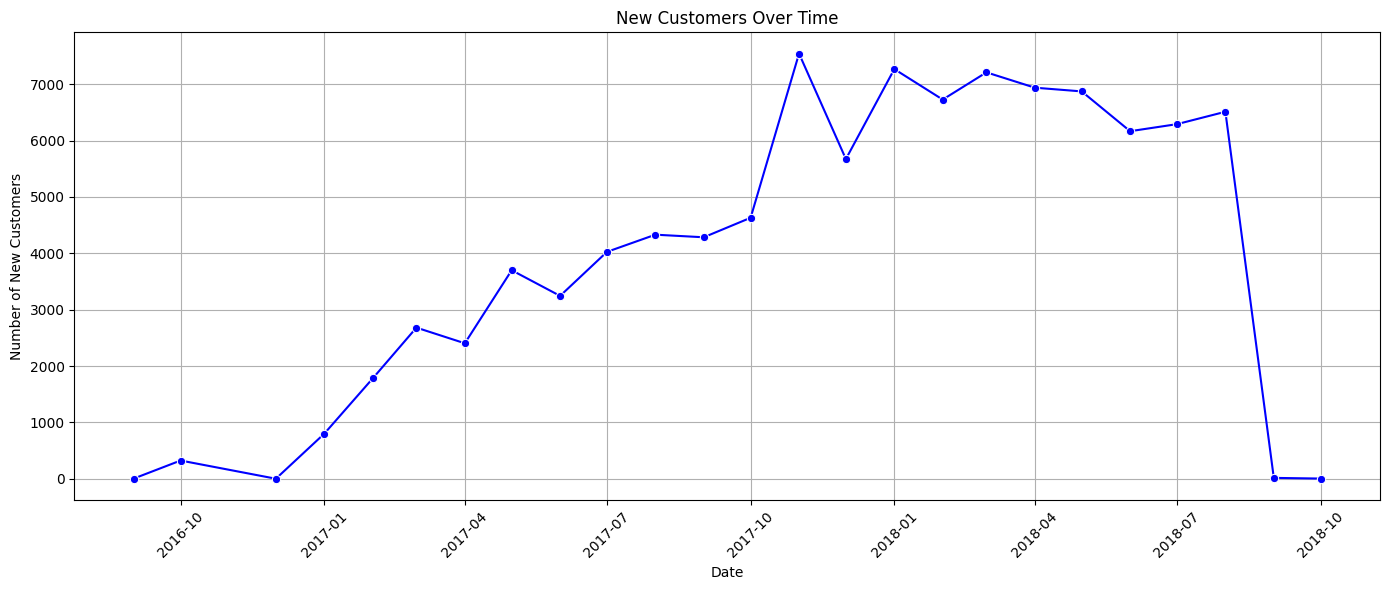

In [51]:
# Step 1: Reset index to flatten the multi-index
new_customer_reset = new_customer.reset_index()

# Step 2: Create a proper datetime column for plotting
new_customer_reset['order_date'] = pd.to_datetime(new_customer_reset[['Year', 'Month']].assign(DAY=1))

# Step 3: Sort by date (optional, good practice)
new_customer_reset = new_customer_reset.sort_values('order_date')

# Step 4: Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=new_customer_reset,
    x='order_date',
    y='New_Customer',
    marker='o',
    color='blue'
)

plt.title('New Customers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Monthly Customer Retention Rate Analysis

In [52]:
# Extract year and month from 'order_purchase_timestamp'
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.to_period('M')

# Group by 'order_month' and count unique customers for each month
customer_counts = final_df.groupby('order_month')['customer_unique_id'].nunique()

# Shift the customer counts by one month to represent the previous month's customer count
previous_month_customers = customer_counts.shift(1)

# Calculate the number of retained customers
retained_customers = customer_counts.combine(previous_month_customers, func=min)

# Calculate retention rate
retention_rate = (retained_customers / previous_month_customers) * 100
retention_rate.head()

order_month
2016-09           NaN
2016-10    100.000000
2016-12      0.311526
2017-01    100.000000
2017-02    100.000000
Freq: M, Name: customer_unique_id, dtype: float64

## A) Visualization of Monthly Customer Retention Rate

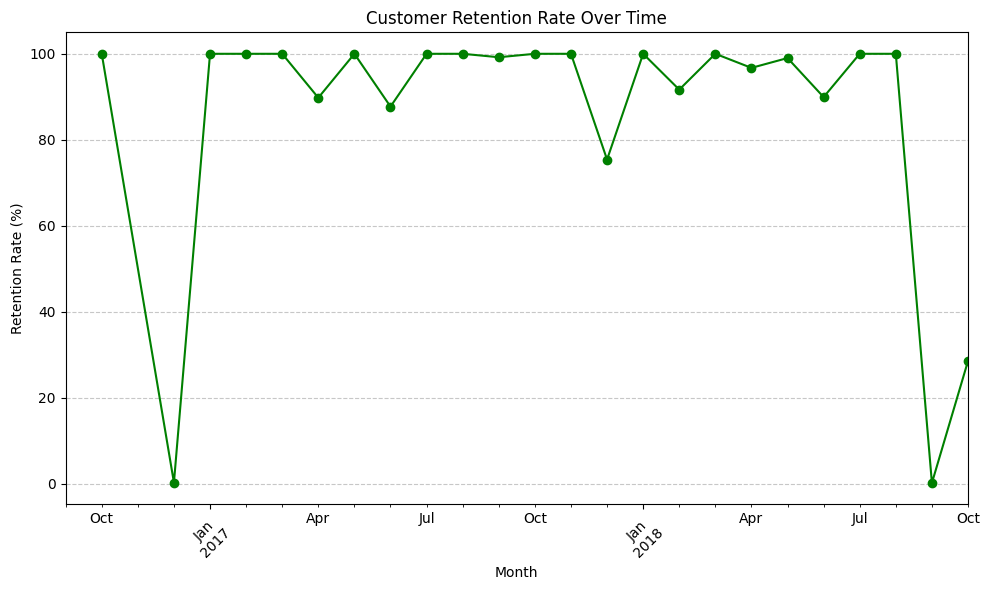

In [53]:
# Plot the retention rate over time
plt.figure(figsize=(10, 6))
retention_rate.plot(kind='line', marker='o', color='green')
plt.title('Customer Retention Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Monthly Revenue Contribution by Customer Type (New vs Existing)

In [54]:
# Determine the first purchase date for each customer
first_purchase=final_df.groupby('customer_unique_id')['order_purchase_timestamp'].min()

# Mark customers as new or existing based on their first purchase date
final_df['customer_type']=final_df.apply(lambda x : 'new' if x['order_purchase_timestamp']==first_purchase[x['customer_unique_id']] else 'existing',axis=1 )

# Calculate total revenue generated by new and existing customers for each month
revenue_by_customer_type=final_df.groupby(['order_month', 'customer_type'])['payment_value'].sum().unstack()
revenue_by_customer_type.head()

customer_type,existing,new
order_month,,
2016-09,NaN,388.47
2016-10,145.51,76833.62
2016-12,NaN,19.62
2017-01,950.75,189855.52
2017-02,1113.71,350734.42


## A) Visualization of Revenue from New vs Existing Customers Over Time

<Figure size 1000x600 with 0 Axes>

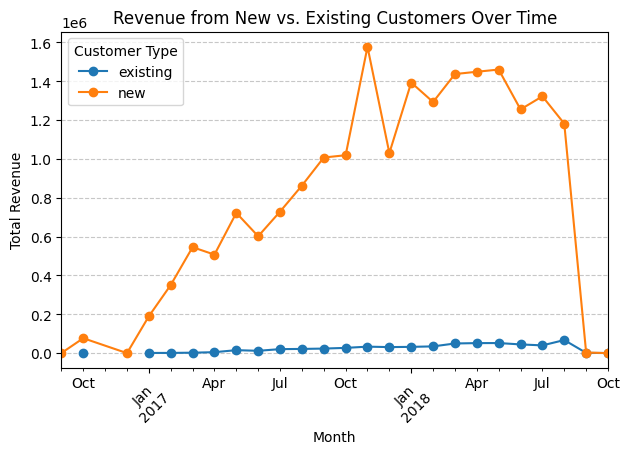

In [55]:
# Plot the revenues from new and existing customers over time
plt.figure(figsize=(10, 6))
revenue_by_customer_type.plot(kind='line', marker='o')
plt.title('Revenue from New vs. Existing Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

# 4. Sales and Quantity Analysis by Product Category

In [58]:
# Extract relevant time components
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.to_period('M')
final_df['order_week']=final_df['order_purchase_timestamp'].dt.to_period('W')
final_df['order_day']=final_df['order_purchase_timestamp'].dt.date
final_df['order_hour']=final_df['order_purchase_timestamp'].dt.hour

# Sales and Quantity Trends by Category
sales_by_category=final_df.groupby(['product_category_name'])['payment_value'].sum()
quantity_by_category=final_df.groupby(['product_category_name'])['order_item_id'].count()

# Get top 15 product categories by total sales
top_15_sales = sales_by_category.sort_values(ascending=False).head(10)
top_15_quantity = quantity_by_category[top_15_sales.index]  # Align with top 15 sales categories

print(sales_by_category.head())
print("-"*35)
print(quantity_by_category.head())

product_category_name
Agro_Industry_And_Commerce    118730.61
Air_Conditioning               91170.66
Art                            30992.93
Arts_And_Craftmanship           2326.17
Audio                          60388.62
Name: payment_value, dtype: float64
-----------------------------------
product_category_name
Agro_Industry_And_Commerce    252
Air_Conditioning              302
Art                           219
Arts_And_Craftmanship          24
Audio                         381
Name: order_item_id, dtype: int64


## A) Visualization of Total Sales by Product Category

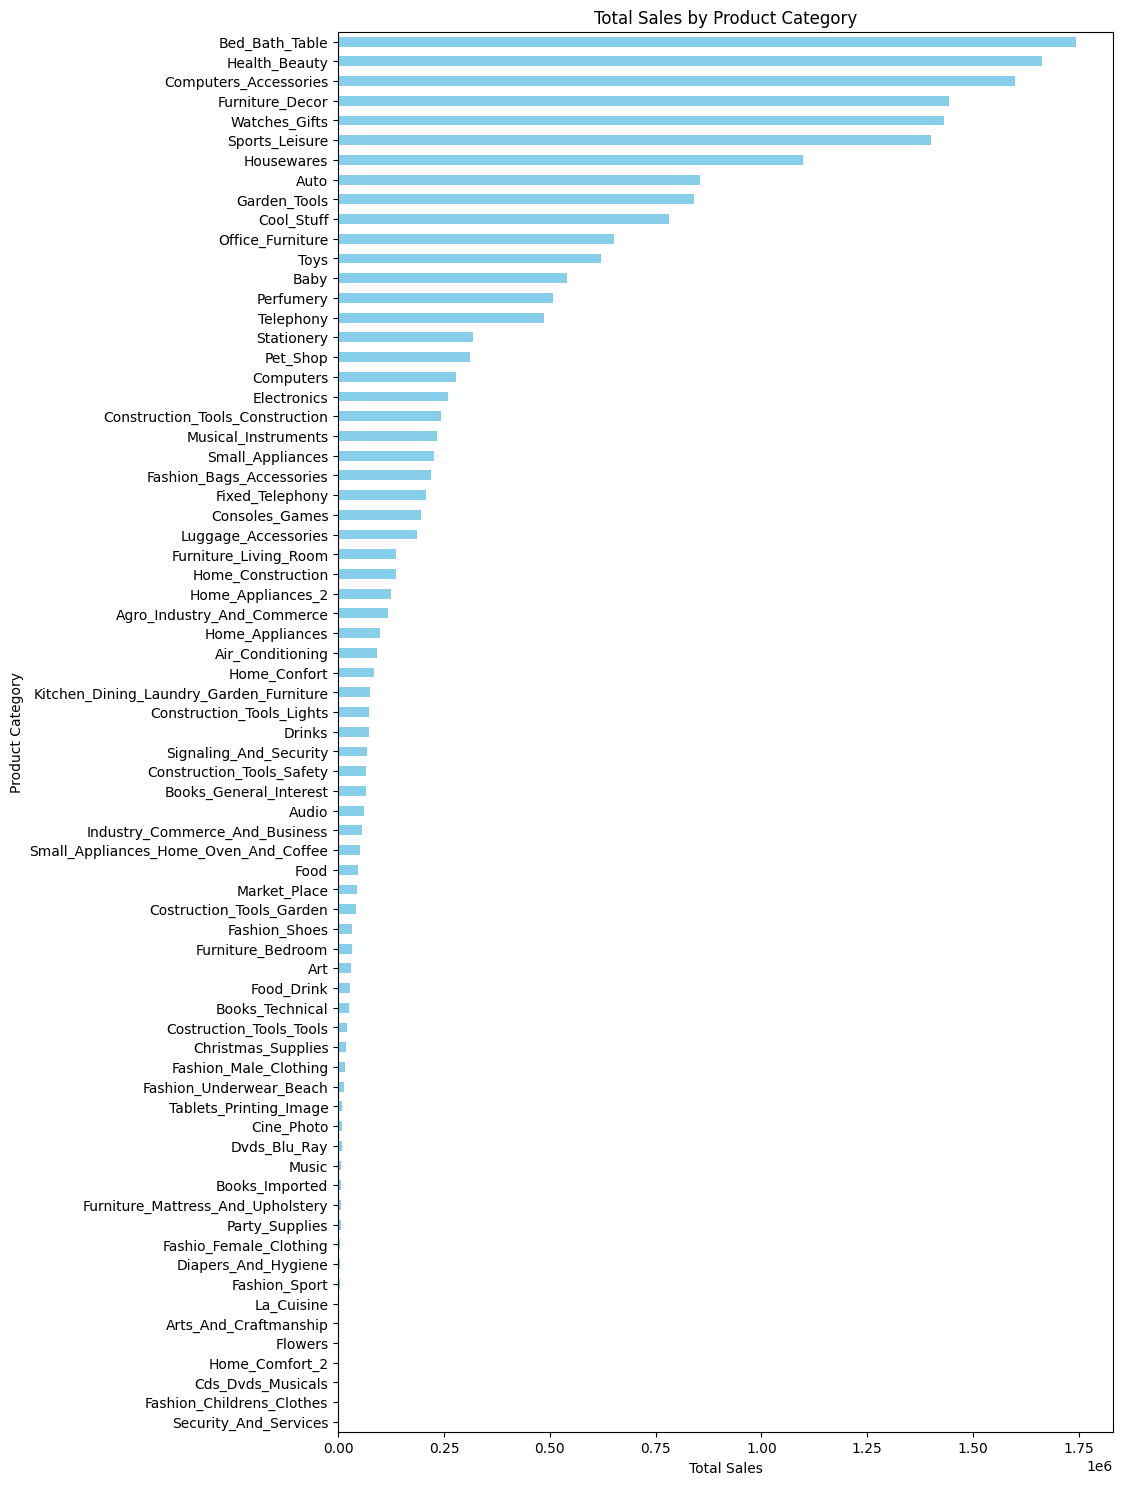

In [60]:
#Bar chart for Total sales by product category
plt.figure(figsize=(10, 40))
plt.subplot(2, 1, 1)
sales_by_category.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

## B) Visualization of Total Quantity Sold by Product Category

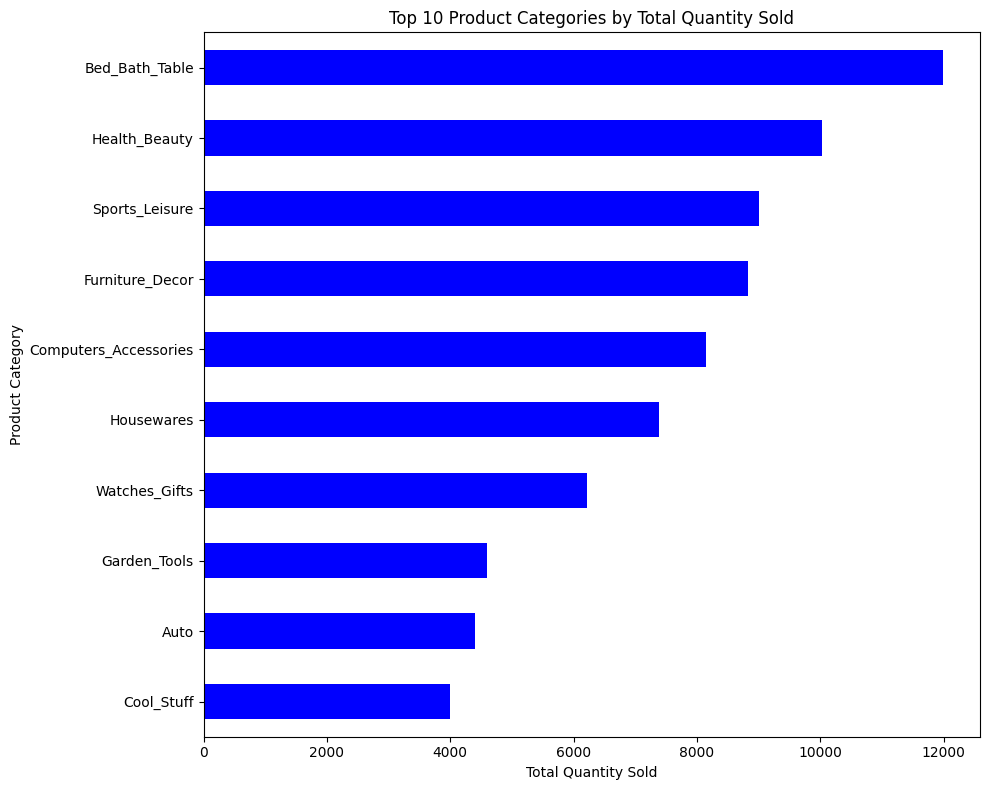

In [62]:
# #Bar chart for Total Quantity by product category
# plt.figure(figsize=(10,40))
# plt.subplot(2,1,1)
# quantity_by_category.sort_values().plot(kind='barh',color='blue')
# plt.title('Total Quantity Sold by Product Category')
# plt.xlabel('Total Quantity Sold')
# plt.ylabel('Product Category')
# plt.show()

plt.figure(figsize=(10, 8))
top_15_quantity.sort_values().plot(kind='barh', color='blue')  # Sort again for ascending visual
plt.title('Top 10 Product Categories by Total Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# 5. Sales and Quantity Analysis by Customer Location

In [59]:
#Sales and Quantity Trends by location
sales_by_location=final_df.groupby(['customer_city'])['payment_value'].sum()
quantity_by_location=final_df.groupby(['customer_city'])['order_item_id'].count()

print(sales_by_location.head())
print("-"*35)
print(quantity_by_location.head())

customer_city
Aadityana        2288.43
Aambaliyasan      242.94
Aantaliya       16903.07
Aarambhada       7186.11
Abiramam           89.19
Name: payment_value, dtype: float64
-----------------------------------
customer_city
Aadityana        32
Aambaliyasan      2
Aantaliya       108
Aarambhada       52
Abiramam          1
Name: order_item_id, dtype: int64


## A) Top 15 Cities by Sales

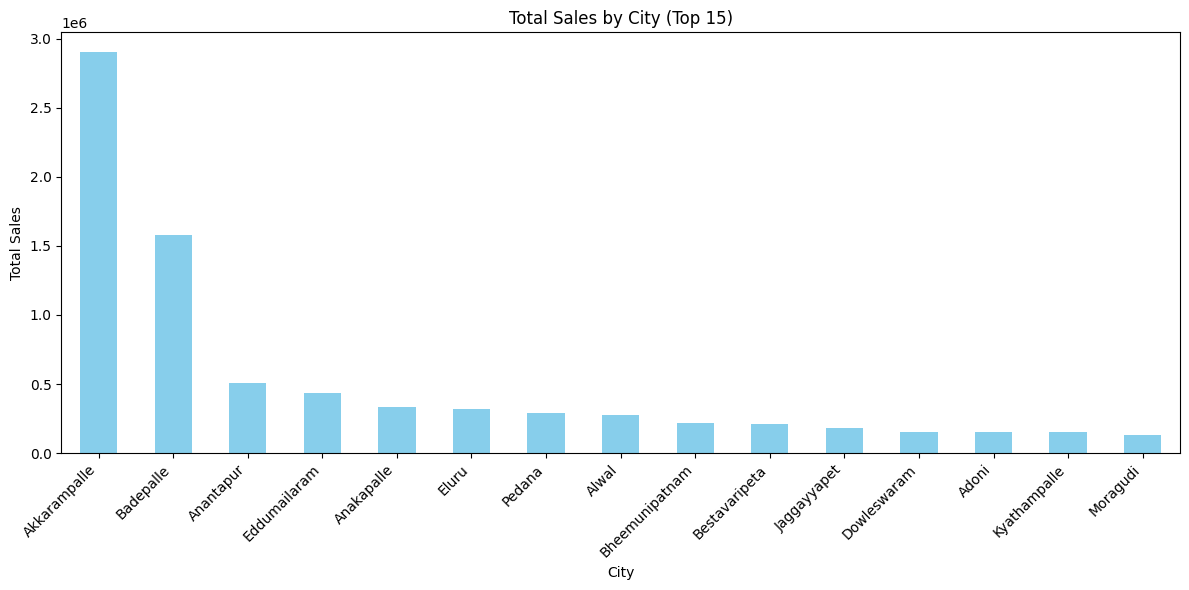

In [60]:
#Bar chart for Total sales by  location
plt.figure(figsize=(12,6))
sales_by_location.sort_values(ascending=False)[:15].plot(kind='bar',color='skyblue')
plt.title('Total Sales by City (Top 15)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45,ha='right' )
plt.tight_layout()
plt.show()

## B) Top 15 Cities by Quantity

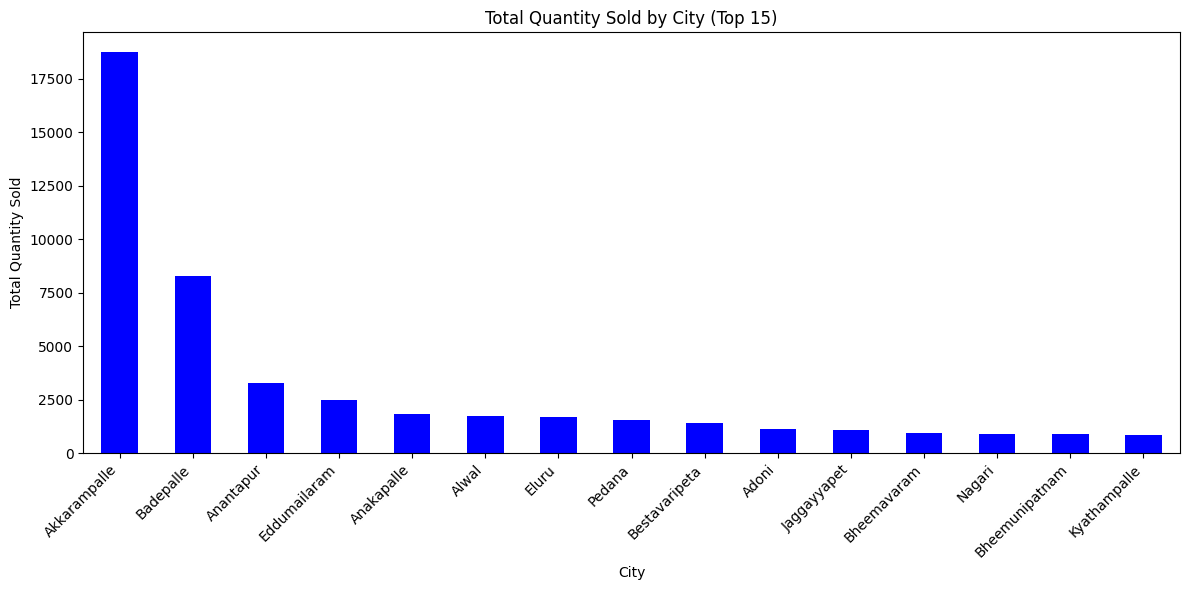

In [61]:
# Bar chart for Total Quantity by Location (Top 15 Cities)
plt.figure(figsize=(12, 6))
quantity_by_location.sort_values(ascending=False).head(15).plot(kind='bar', color='blue')
plt.title('Total Quantity Sold by City (Top 15)')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Sales Trend Analysis by Time Periods

In [62]:
# Sales and Quantity Trends by Time Periods
sales_by_month = final_df.groupby('order_month')['payment_value'].sum()
sales_by_week = final_df.groupby('order_week')['payment_value'].sum()
sales_by_day = final_df.groupby('order_day')['payment_value'].sum()
sales_by_hour = final_df.groupby('order_hour')['payment_value'].sum()

print(sales_by_month.head())
print("-"*50)
print(sales_by_week.head())
print("-"*50)
print(sales_by_day.head())
print("-"*50)
print(sales_by_hour.head())

order_month
2016-09       388.47
2016-10     76979.13
2016-12        19.62
2017-01    190806.27
2017-02    351848.13
Freq: M, Name: payment_value, dtype: float64
--------------------------------------------------
order_week
2016-08-29/2016-09-04      272.46
2016-09-05/2016-09-11       75.06
2016-09-12/2016-09-18       40.95
2016-09-26/2016-10-02      109.34
2016-10-03/2016-10-09    71280.56
Freq: W-SUN, Name: payment_value, dtype: float64
--------------------------------------------------
order_day
2016-09-04    272.46
2016-09-05     75.06
2016-09-13     40.95
2016-09-15      0.00
2016-10-02    109.34
Name: payment_value, dtype: float64
--------------------------------------------------
order_hour
0    474913.91
1    210304.96
2     92701.68
3     51356.55
4     36004.52
Name: payment_value, dtype: float64


## A) Monthly Sales Trend Analysis

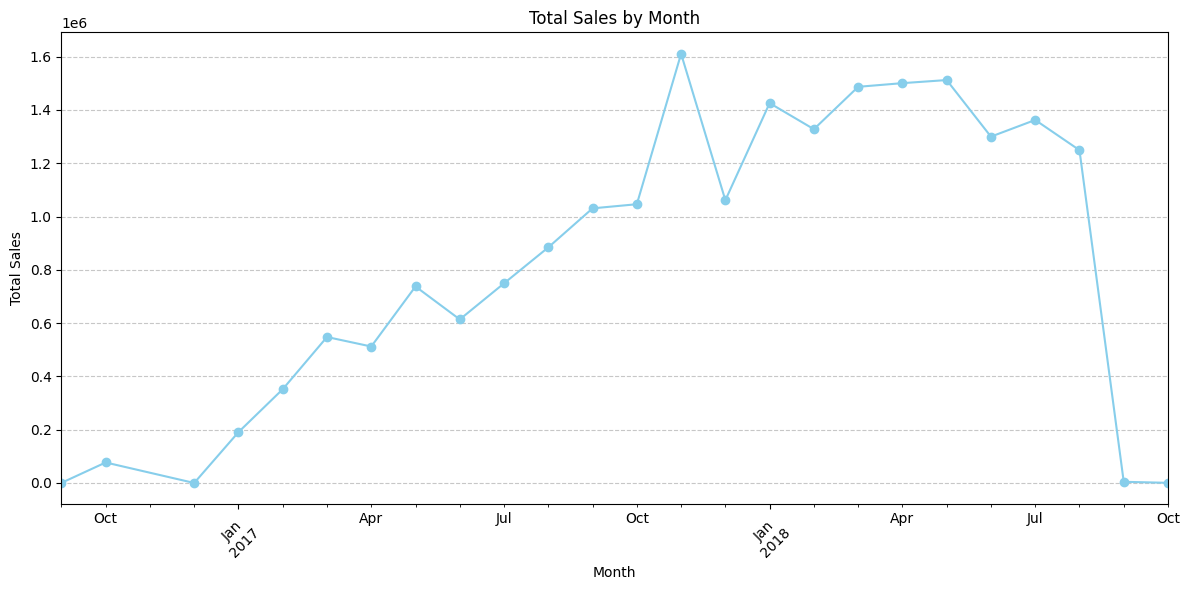

In [63]:
# --- Line Chart: Total Sales by Month ---
plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## B) Weekly Sales Trend Analysis

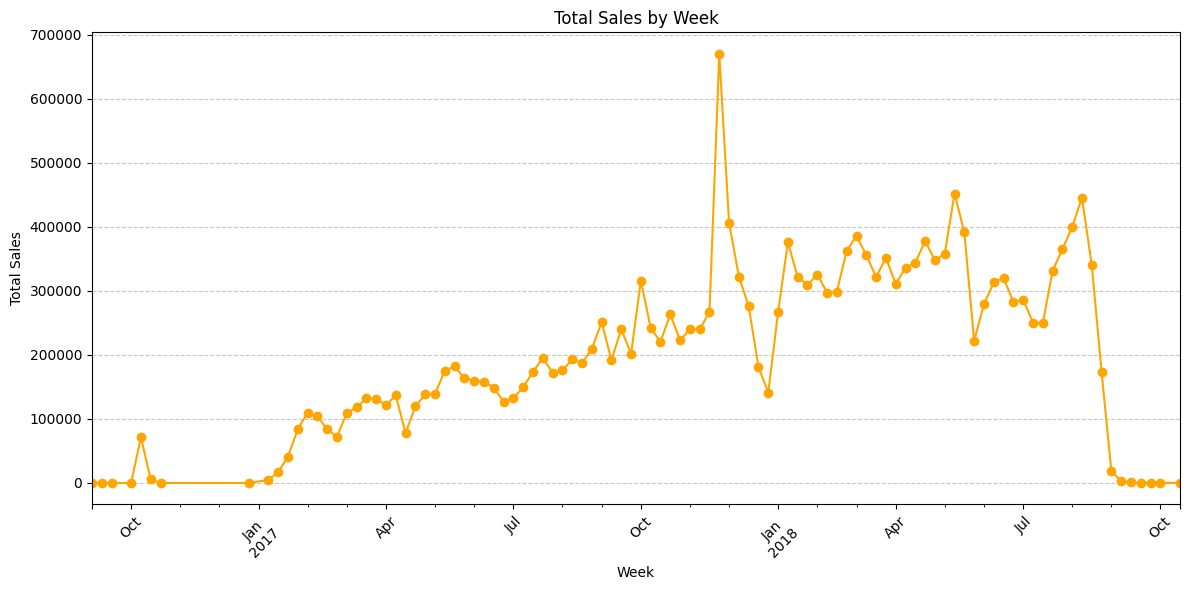

In [64]:
# --- Line Chart: Total Sales by Week ---
plt.figure(figsize=(12, 6))
sales_by_week.plot(kind='line', marker='o', color='orange')
plt.title('Total Sales by Week')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## C) Daily Sales Trend Analysis

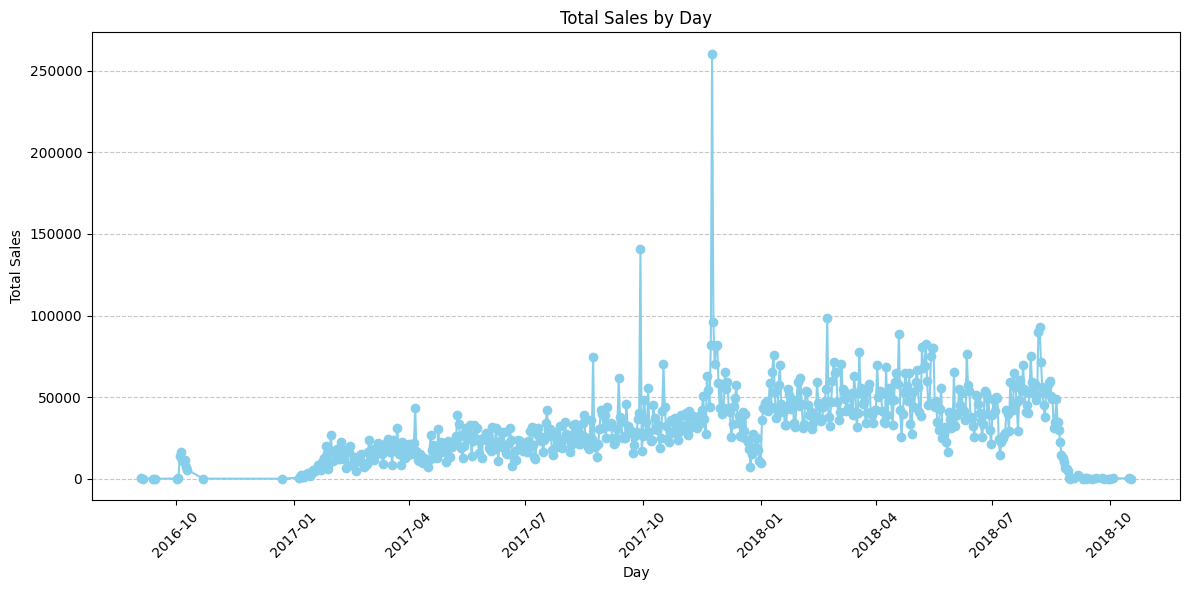

In [65]:
# --- Line Chart: Total Sales by Day ---
plt.figure(figsize=(12, 6))
sales_by_day.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Sales by Day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## D) Hourly Sales Trend Analysis

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

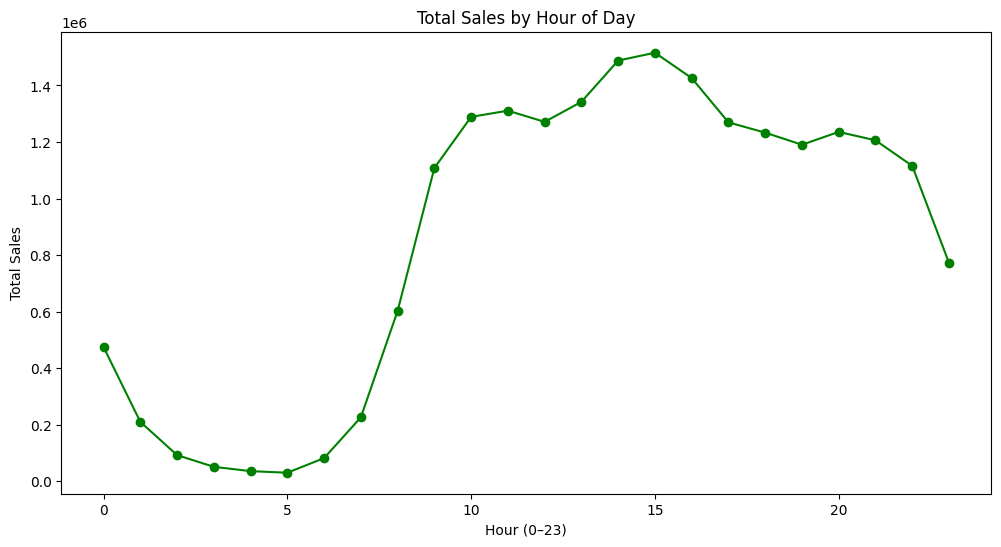

In [66]:
# --- Line Chart: Total Sales by Hour ---
plt.figure(figsize=(12, 6))
sales_by_hour.plot(kind='line', marker='o', color='green')
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Total Sales')
plt.xticks()

# 7. Sales and Quantity Analysis by Payment Method

In [67]:
# Sales and Quantity Trends by Payment Method
sales_by_payment_method = final_df.groupby('payment_type')['payment_value'].sum()
quantity_by_payment_method = final_df.groupby('payment_type')['order_item_id'].count()

print(sales_by_payment_method.head())
print("-"*35)
print(quantity_by_payment_method.head())

payment_type
UPI             4110920.74
credit_card    15776896.15
debit_card       257374.89
not_defined           0.00
voucher          435917.84
Name: payment_value, dtype: float64
-----------------------------------
payment_type
UPI            23018
credit_card    87266
debit_card      1699
not_defined        0
voucher         6332
Name: order_item_id, dtype: int64


## A) Visualization of Total Sales by Payment Method

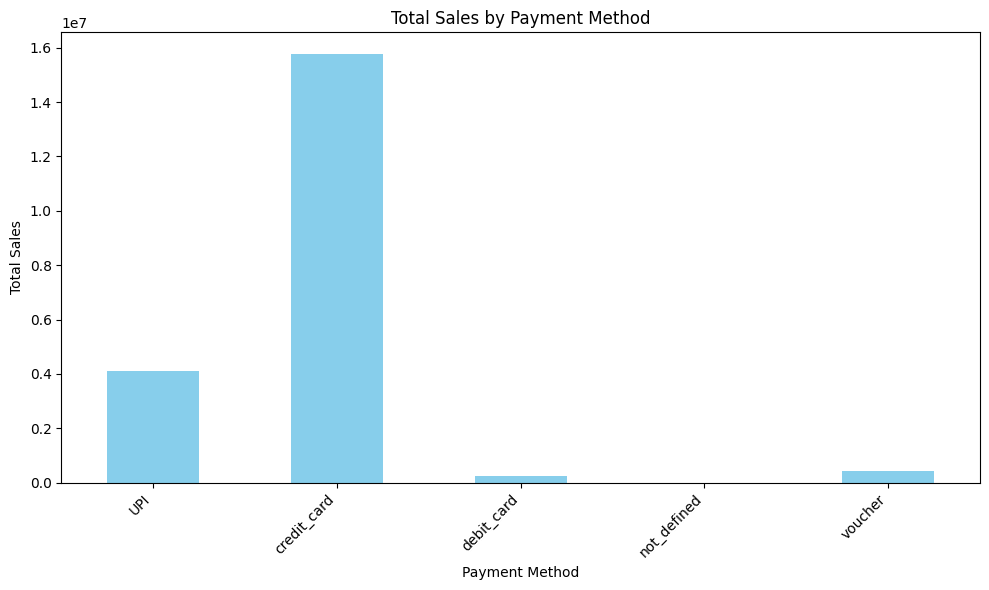

In [68]:
#Bar chart for Total Sales by Payment Method
plt.figure(figsize=(10, 6))
sales_by_payment_method.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## B) Visualization of Total Quantity Sold by Payment Method

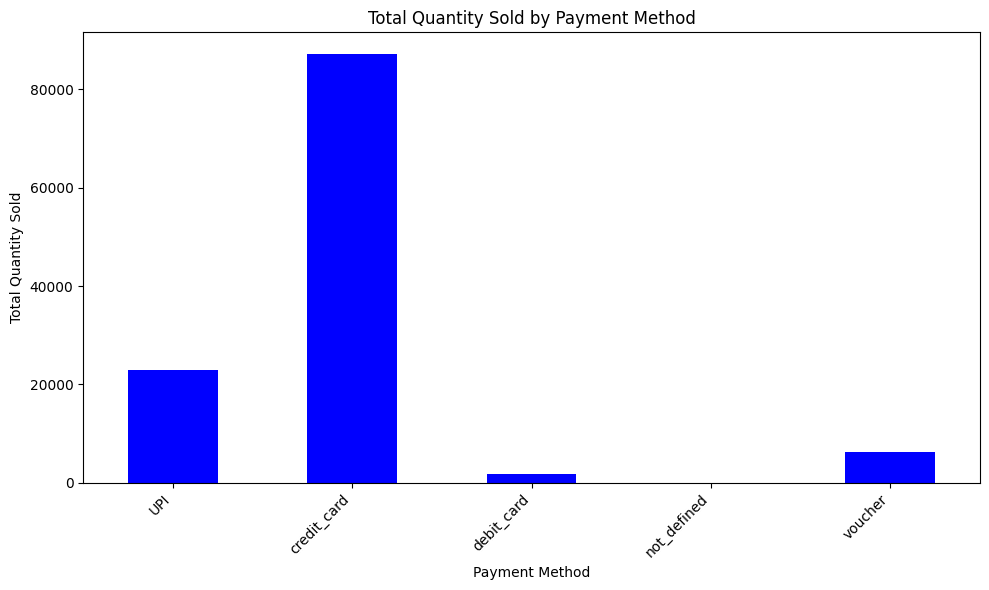

In [69]:
#Bar chart for Total Quantity Sold by Payment Method
plt.figure(figsize=(10, 6))
quantity_by_payment_method.plot(kind='bar', color='blue')
plt.title('Total Quantity Sold by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 8. Most Popular Product by Month

In [70]:
# popolar product by month

# Step 1: Group by month and product, count frequency
popular_product_by_month = final_df.groupby(['order_month', 'product_id']) \
                                   .size() \
                                   .reset_index(name='frequency') \
                                   .sort_values(by=['order_month', 'frequency'], ascending=[True, False])

# Step 2: Get top product (most purchased) for each month
top_product_by_month = popular_product_by_month.groupby('order_month').head(1)

# Step 3: Merge with final_df to get product category name
top_product_by_month = top_product_by_month.merge(
    final_df[['product_id', 'product_category_name']].drop_duplicates(),
    on='product_id',
    how='left'
)

# Step 4: Add a formatted month column for plotting
top_product_by_month['month'] = top_product_by_month['order_month'].dt.strftime('%b-%Y')

# Step 5: Display result
top_product_by_month

,order_month,product_id,frequency,product_category_name,month
0,2016-09,5a6b04657a4c5ee34285d1e4619a96b4,3,Health_Beauty,Sep-2016
1,2016-10,eba7488e1c67729f045ab43fac426f2e,11,Perfumery,Oct-2016
2,2016-12,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1,Fashion_Bags_Accessories,Dec-2016
3,2017-01,985c412b0ac92ed9d8a76bbeab6d44eb,16,Furniture_Decor,Jan-2017
4,2017-02,42fffc68ff7e8176f11baaf4a4227557,13,Health_Beauty,Feb-2017
5,2017-03,7e0dc102074f8285580c9777f79c90cf,45,Garden_Tools,Mar-2017
6,2017-04,99a4788cb24856965c36a24e339b6058,41,Bed_Bath_Table,Apr-2017
7,2017-05,99a4788cb24856965c36a24e339b6058,66,Bed_Bath_Table,May-2017
8,2017-06,42a2c92a0979a949ca4ea89ec5c7b934,73,Housewares,Jun-2017
9,2017-07,f1c7f353075ce59d8a6f3cf58f419c9c,63,Bed_Bath_Table,Jul-2017


## A) Visualization of Most Popular Product Category by Month

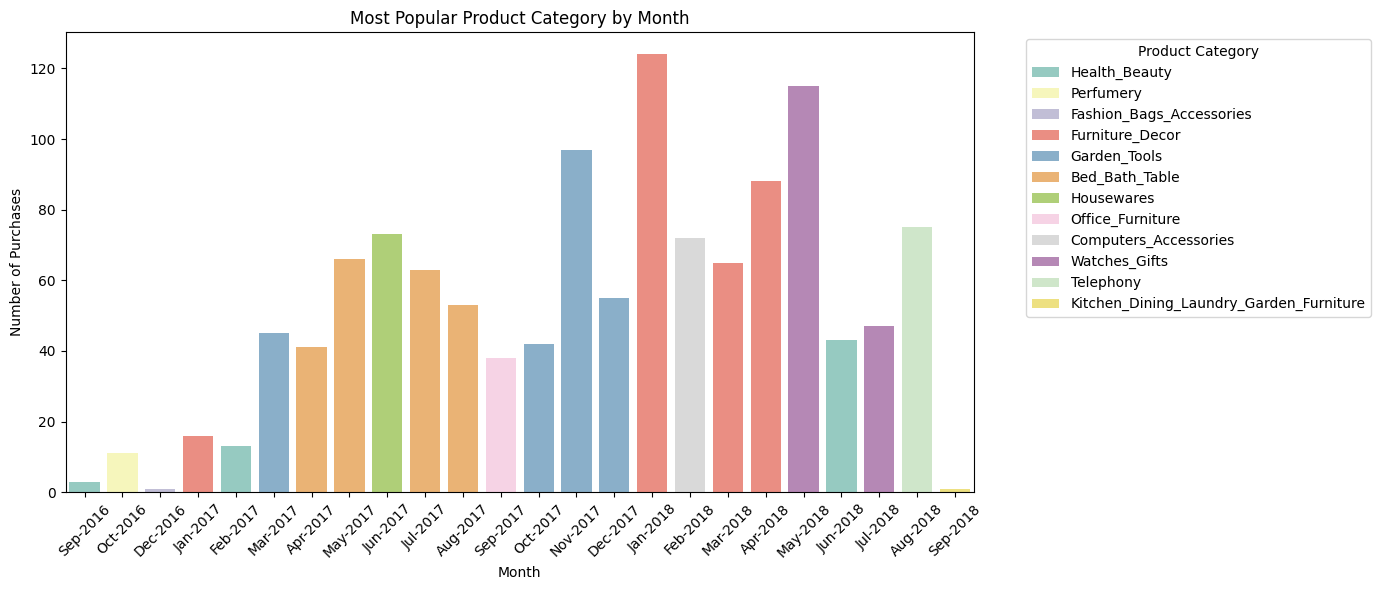

In [71]:
# Sort data by month for proper plotting
top_product_by_month = top_product_by_month.sort_values('order_month')

plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_product_by_month,
    x='month',
    y='frequency',
    hue='product_category_name',
    dodge=False,  # To keep 1 bar per month
    palette='Set3'
)

plt.title('Most Popular Product Category by Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 9. Top-Selling Product Categories Across Sellers

In [72]:
# popular product by seller

# Step 1: Group by seller and product, count frequency
popular_product_by_seller = final_df.groupby(['seller_id', 'product_id']) \
                                    .size() \
                                    .reset_index(name='frequency') \
                                    .sort_values(by=['seller_id', 'frequency'], ascending=[True, False])

# Step 2: Get top product (most sold) per seller
top_product_by_seller = popular_product_by_seller.groupby('seller_id').head(1)

# Step 3: Merge to get product category name
top_product_by_seller = top_product_by_seller.merge(
    final_df[['product_id', 'product_category_name']].drop_duplicates(),
    on='product_id',
    how='left'
)

# Step 4: Count how many sellers have each category as their top-selling product
top_category_counts = top_product_by_seller['product_category_name'].value_counts().reset_index()
top_category_counts.columns = ['product_category_name', 'seller_count']

# Optional: Show top 10 categories
top_category_counts = top_category_counts.head(10)
top_category_counts

,product_category_name,seller_count
0,Health_Beauty,296
1,Sports_Leisure,264
2,Housewares,238
3,Furniture_Decor,216
4,Auto,209
5,Computers_Accessories,153
6,Bed_Bath_Table,118
7,Toys,114
8,Baby,102
9,Garden_Tools,98


## A) Visualization of Top Product Categories by Seller Preference

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\2875874297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


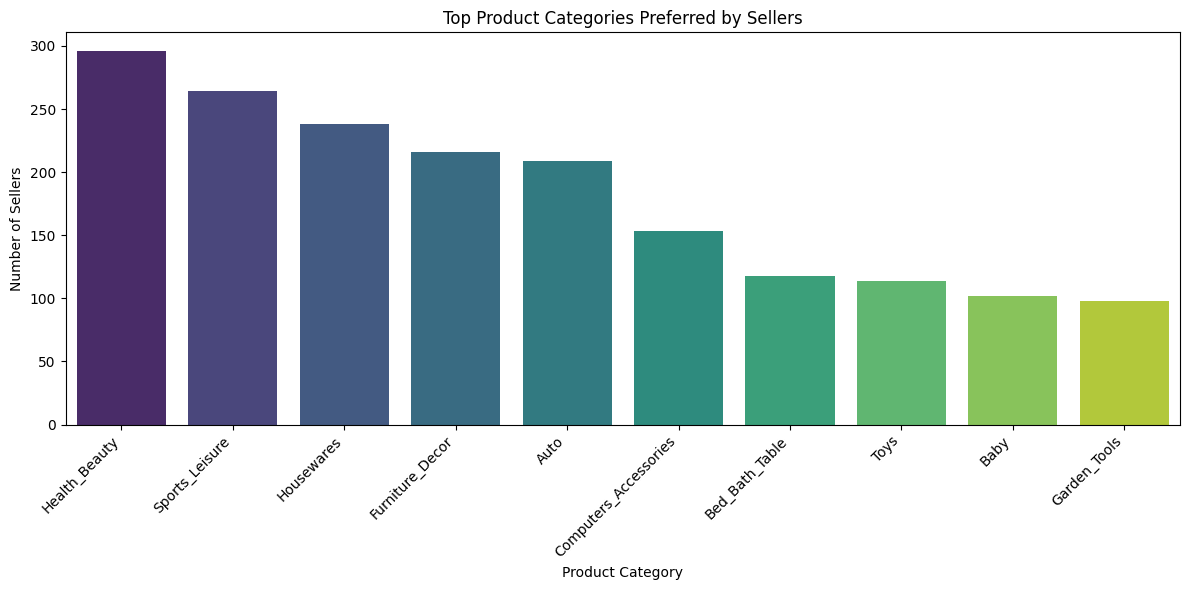

In [73]:
# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_category_counts,
    x='product_category_name',
    y='seller_count',
    palette='viridis'
)
plt.title('Top Product Categories Preferred by Sellers')
plt.xlabel('Product Category')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 10. Most Popular Product by Category

In [74]:
# popular product by category
popular_product_by_category=final_df.groupby(['product_category_name','product_id']).size().reset_index(name='frequency').sort_values(by=['product_category_name','frequency'],ascending=[True,False])
top_product_by_category = popular_product_by_category.groupby('product_category_name').head(1)
top_product_by_category.head(10)

,product_category_name,product_id,frequency
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,44
144,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
218,Art,4fe644d766c7566dbc46fb851363cb3b,109
267,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
316,Audio,db5efde3ad0cc579b130d71c4b2db522,50
923,Auto,4fcb3d9a5f4871e8362dfedbdb02b064,92
2964,Baby,cac9e5692471a0700418aa3400b9b2b1,100
5002,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,528
6385,Books_General_Interest,f35927953ed82e19d06ad3aac2f06353,59
6405,Books_Imported,68ad45d48d69404aeb71ce87e1b2c948,8


## A) Visualization of Top 15 Most Popular Products by Category

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\3579539936.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


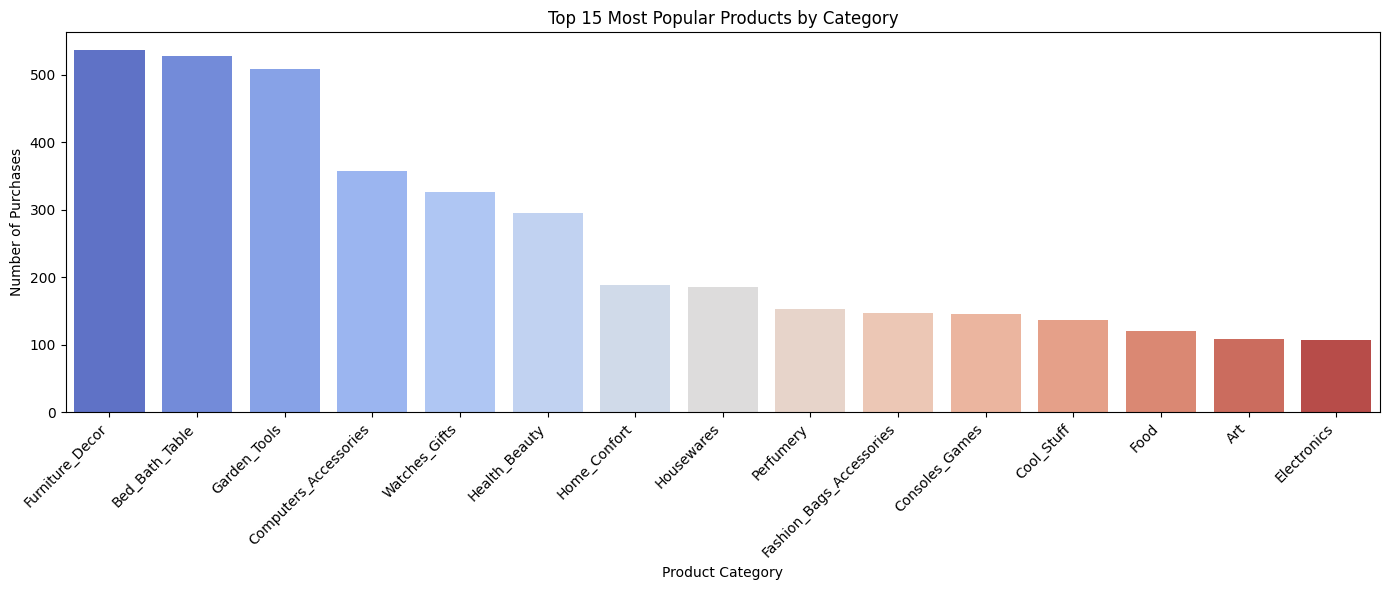

In [75]:
# Show only top 15 for clean visualization
top_n = 15
top_product_by_category_sorted = top_product_by_category.sort_values(by='frequency', ascending=False).head(top_n)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_product_by_category_sorted,
    x='product_category_name',
    y='frequency',
    palette='coolwarm'
)

plt.title(f'Top {top_n} Most Popular Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 11. Most Popular Product Category by State

In [76]:
# popular category by state

# Step 1: Find the most frequently purchased product per customer state
popular_product_by_state = final_df.groupby(['customer_state', 'product_id']) \
                                   .size() \
                                   .reset_index(name='frequency') \
                                   .sort_values(by=['customer_state', 'frequency'], ascending=[True, False])

# Step 2: Get the top product per state
top_product_by_state = popular_product_by_state.groupby('customer_state').head(1)

# Step 3: Merge to get product category name
top_product_by_state = top_product_by_state.merge(
    final_df[['product_id', 'product_category_name']].drop_duplicates(),
    on='product_id',
    how='left'
)
top_product_by_state

,customer_state,product_id,frequency,product_category_name
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,346,Furniture_Decor
1,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,12,Housewares
2,Chhattisgarh,422879e10f46682990de24d770e7f83d,42,Garden_Tools
3,Delhi,53759a2ecddad2bb87a079a1f1519f73,25,Garden_Tools
4,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,1,Office_Furniture
5,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,52,Furniture_Decor
6,Haryana,35afc973633aaeb6b877ff57b2793310,17,Home_Confort
7,Himachal Pradesh,422879e10f46682990de24d770e7f83d,6,Garden_Tools
8,Jammu & Kashmir,89b190a046022486c635022524a974a8,15,Furniture_Decor
9,Karnataka,422879e10f46682990de24d770e7f83d,25,Garden_Tools


## A) Visualization of Most Popular Product Category by State

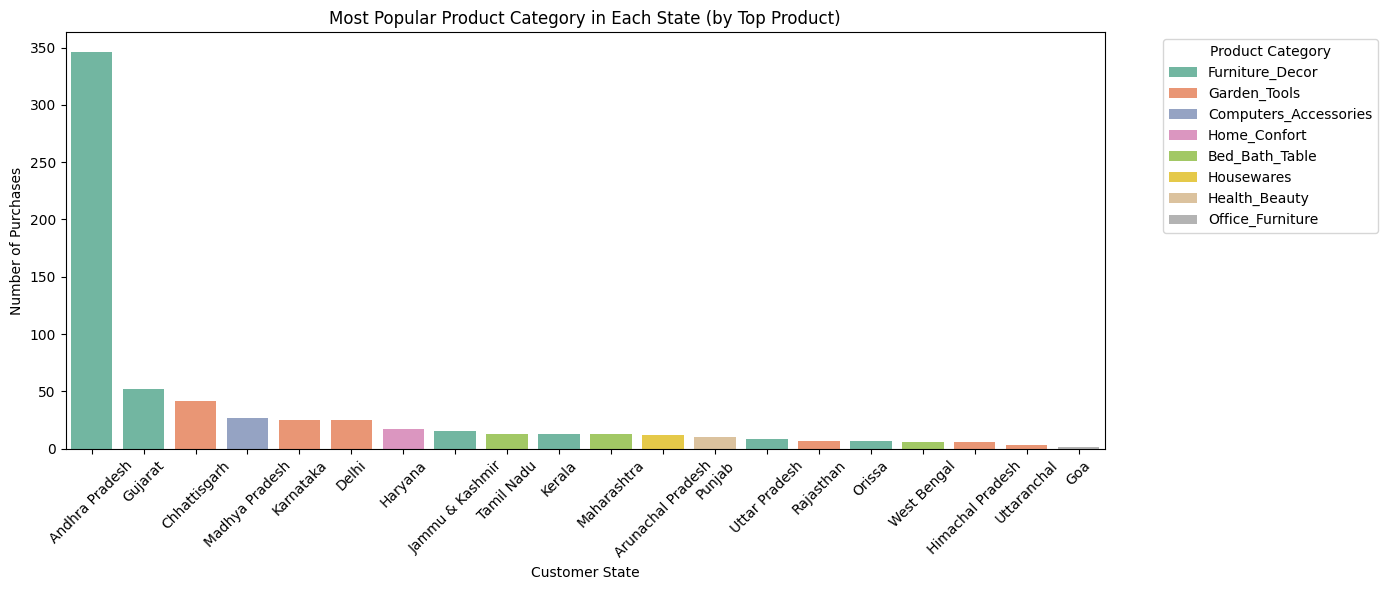

In [77]:
# Sort for better plotting
top_product_by_state = top_product_by_state.sort_values(by='frequency', ascending=False)

# Step 4: Plot the graph
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_product_by_state,
    x='customer_state',
    y='frequency',
    hue='product_category_name',
    dodge=False,
    palette='Set2'
)

plt.title('Most Popular Product Category in Each State (by Top Product)')
plt.xlabel('Customer State')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 12. Top 10 Most Expensive Products by Category

In [78]:
top10_product=final_df[['product_id','product_category_name','price']].sort_values(by= 'price',ascending=False).head(10).reset_index()
top10_product

,index,product_id,product_category_name,price
0,16177,489ae2aa008f021502940f251d4cce7f,Housewares,6735.00
1,25418,69c590f7ffc7bf8db97190b6cb6ed62e,Computers,6729.00
2,4700,1bdf5e6731585cf01aa8169c7028d6ad,Art,6499.00
3,32766,a6492cc69376c469ab6f61d8f44de961,Small_Appliances,4799.00
4,14462,c3ed642d592594bb648ff4a04cee2747,Small_Appliances,4690.00
5,48803,259037a6a41845e455183f89c5035f18,Computers,4590.00
6,77294,a1beef8f3992dbd4cd8726796aa69c53,Musical_Instruments,4399.87
7,7094,6cdf8fc1d741c76586d8b6b15e9eef30,Consoles_Games,4099.99
8,108144,dd113cb02b2af9c8e5787e8f1f0722f6,Sports_Leisure,4059.00
9,100520,6902c1962dd19d540807d0ab8fade5c6,Watches_Gifts,3999.90


## A) Visualization of Top 10 Most Expensive Products by Category

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\362729640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


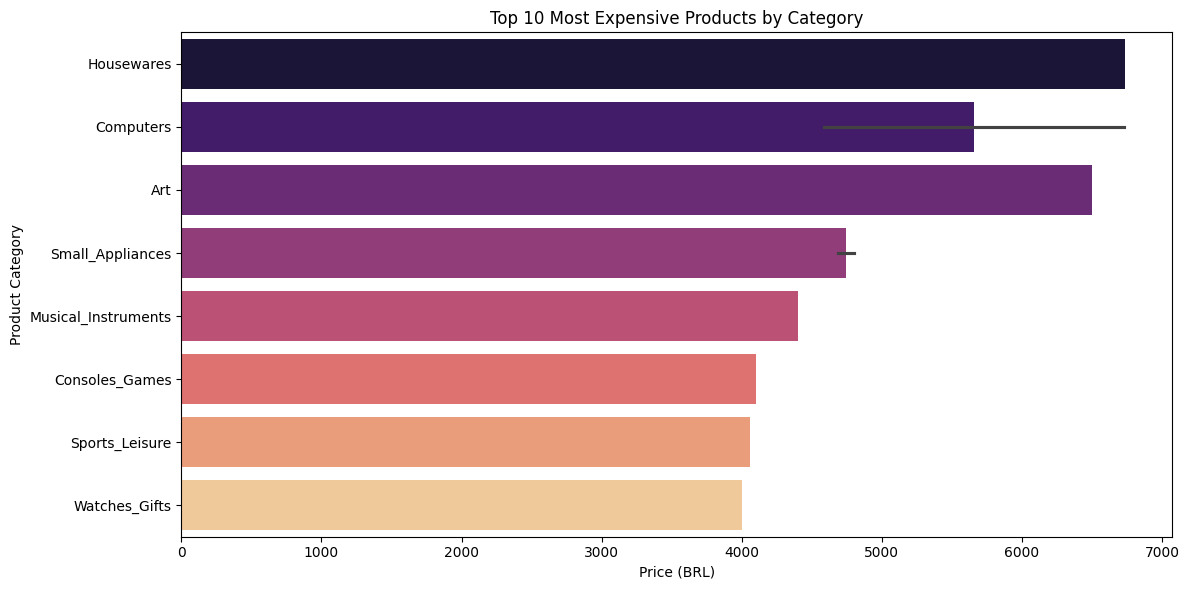

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='price',
    y='product_category_name',
    data=top10_product,
    palette='magma'
)

plt.title('Top 10 Most Expensive Products by Category')
plt.xlabel('Price (BRL)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# 13. Customer Segmentation and Revenue Contribution by Category

In [80]:
# total revenue for each customer
customer_revenue = final_df.groupby(['customer_id'])[['payment_value']].sum().reset_index()
# decile analysis for customers
customer_revenue['customer_decile'] = pd.qcut(customer_revenue['payment_value'], q=10, labels=False)
#  customer types categories based on decile results for customers
customer_revenue['customer_category'] = pd.qcut(customer_revenue['payment_value'], q=4, labels=['bronze', 'silver', 'gold', 'platinum'])

# Group by customer category and sum total revenue
category_revenue = customer_revenue.groupby('customer_category')['payment_value'].sum().reset_index()

# Sort by revenue (for nicer plots)
category_revenue = category_revenue.sort_values(by='payment_value', ascending=False)
category_revenue

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\1449293331.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_revenue = customer_revenue.groupby('customer_category')['payment_value'].sum().reset_index()


,customer_category,payment_value
3,platinum,13739961.94
2,gold,3666463.30
1,silver,2097853.13
0,bronze,1076831.25


## A) Visualization of Revenue Contribution by Customer Category

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\1441700853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


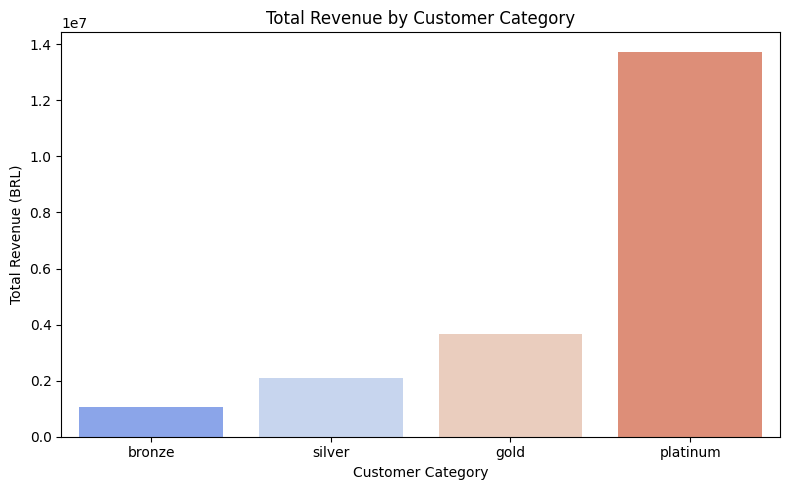

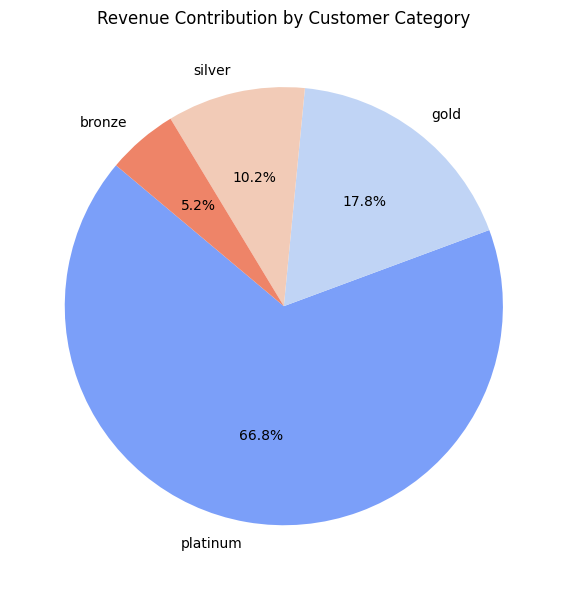

In [81]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='customer_category',
    y='payment_value',
    data=category_revenue,
    palette='coolwarm'
)

plt.title('Total Revenue by Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('Total Revenue (BRL)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(
    category_revenue['payment_value'],
    labels=category_revenue['customer_category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm', len(category_revenue))
)

plt.title('Revenue Contribution by Customer Category')
plt.tight_layout()
plt.show()

# 14. Seller Segmentation and Revenue Contribution by Category

In [82]:
# total revenue for each seller
seller_revenue = final_df.groupby(['seller_id'])[['payment_value']].sum().reset_index()
# decile analysis for seller
seller_revenue['seller_decile'] = pd.qcut(seller_revenue['payment_value'], q=10, labels=False)
#  seller types categories based on decile results for customers
seller_revenue['seller_category'] = pd.qcut(seller_revenue['payment_value'], q=4, labels=['bronze', 'silver', 'gold', 'platinum'])

# Aggregate revenue per seller category
category_revenue_seller = seller_revenue.groupby('seller_category')['payment_value'].sum().reset_index()

# sort by revenue
category_revenue_seller = category_revenue_seller.sort_values(by='payment_value', ascending=False)
category_revenue_seller

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\3256408179.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_revenue_seller = seller_revenue.groupby('seller_category')['payment_value'].sum().reset_index()


,seller_category,payment_value
3,platinum,17725702.69
2,gold,2024281.19
1,silver,551134.73
0,bronze,117169.54


## A) Visualization of Revenue Contribution by Seller Category

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\1593899259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='seller_category', ylabel='payment_value'>

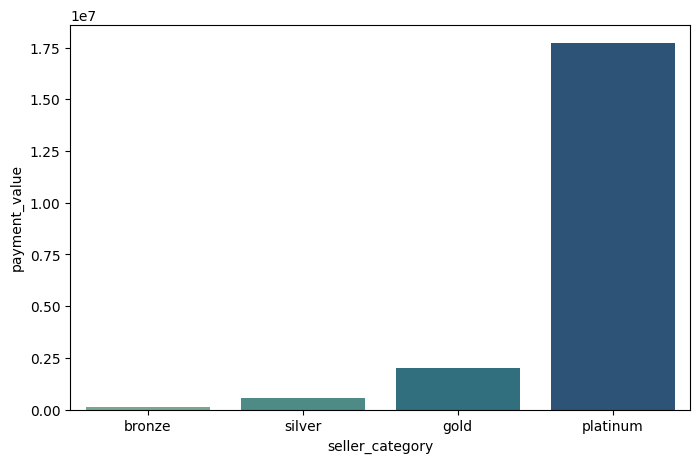

In [83]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='seller_category',
    y='payment_value',
    data=category_revenue_seller,
    palette='crest'
)

# 15. Frequently Bought Together: Top 2-Product Combinations

In [84]:
#product list purchased by customer in 1 day 
product_list = final_df.groupby(['customer_id', 'order_day']).agg({'product_category_name': lambda x: x.ravel().tolist()}).reset_index()

#list of products which have more than 1 in the list 
combinations_list = []
for row in product_list.product_category_name:
    combinations = list(itertools.combinations(row, 2))
    combinations_list.append(combinations)

#for count of combinations 
combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)

#finding a combination of 2 products  
combination_of_2_produuct =combination_counts.value_counts()

#top 10 2 product combination
combination_of_2_produuct.head(10)

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\2677026565.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  product_list = final_df.groupby(['customer_id', 'order_day']).agg({'product_category_name': lambda x: x.ravel().tolist()}).reset_index()


(Bed_Bath_Table, Bed_Bath_Table)                  5931
(Furniture_Decor, Furniture_Decor)                4526
(Housewares, Housewares)                          3137
(Computers_Accessories, Computers_Accessories)    2791
(Garden_Tools, Garden_Tools)                      2569
(Sports_Leisure, Sports_Leisure)                  2071
(Health_Beauty, Health_Beauty)                    2067
(Office_Furniture, Office_Furniture)              1687
(Watches_Gifts, Watches_Gifts)                     915
(Telephony, Telephony)                             898
Name: count, dtype: int64

## A) Visualization of Top 10 Frequently Bought Together Product Pairs

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\620802202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


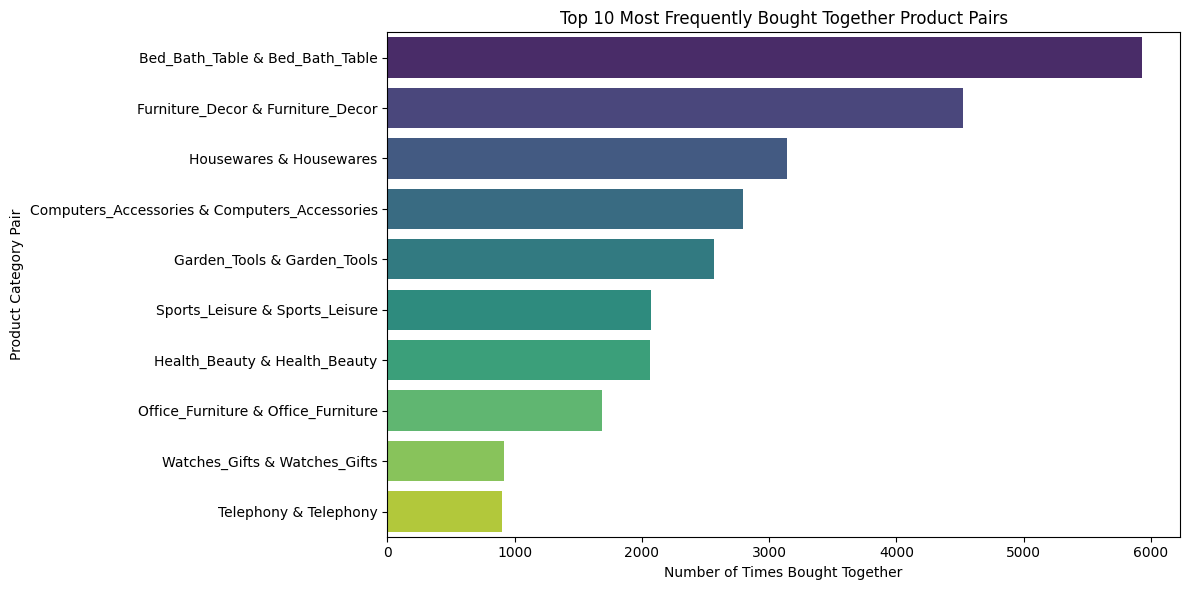

In [85]:
# Convert combinations to readable strings
top_10_combinations = combination_of_2_produuct.head(10)
top_10_combinations = top_10_combinations.reset_index()
top_10_combinations.columns = ['product_pair', 'count']
top_10_combinations['product_pair'] = top_10_combinations['product_pair'].apply(lambda x: f"{x[0]} & {x[1]}")

plt.figure(figsize=(12, 6))
sns.barplot(
    y='product_pair',
    x='count',
    data=top_10_combinations,
    palette='viridis'
)

plt.title('Top 10 Most Frequently Bought Together Product Pairs')
plt.xlabel('Number of Times Bought Together')
plt.ylabel('Product Category Pair')
plt.tight_layout()
plt.show()

# 16. Top 3-Product Combinations Frequently Bought Together

In [86]:
# for finding 3 product combinations 

combinations_list = []
for row in product_list.product_category_name:
    combinations = list(itertools.combinations(row, 3))
    combinations_list.append(combinations)

#for count of combinations 
combination_counts_3 = pd.Series(combinations_list).explode().reset_index(drop=True)

#finding a combination of 2 products  
combination_of_3_produuct =combination_counts_3.value_counts()

#top 10 2 product combination
combination_of_3_produuct.head(10)

(Bed_Bath_Table, Bed_Bath_Table, Bed_Bath_Table)                         22284
(Office_Furniture, Office_Furniture, Office_Furniture)                    9615
(Garden_Tools, Garden_Tools, Garden_Tools)                                7912
(Bed_Bath_Table, Bed_Bath_Table, Housewares)                              6392
(Bed_Bath_Table, Housewares, Bed_Bath_Table)                              6164
(Housewares, Bed_Bath_Table, Bed_Bath_Table)                              5532
(Furniture_Decor, Furniture_Decor, Furniture_Decor)                       5427
(Housewares, Housewares, Housewares)                                      5117
(Computers_Accessories, Computers_Accessories, Computers_Accessories)     4930
(Housewares, Bed_Bath_Table, Housewares)                                  3094
Name: count, dtype: int64

## A) Visualization of Top 10 Frequently Bought Together 3-Product Combinations

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\2043106862.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


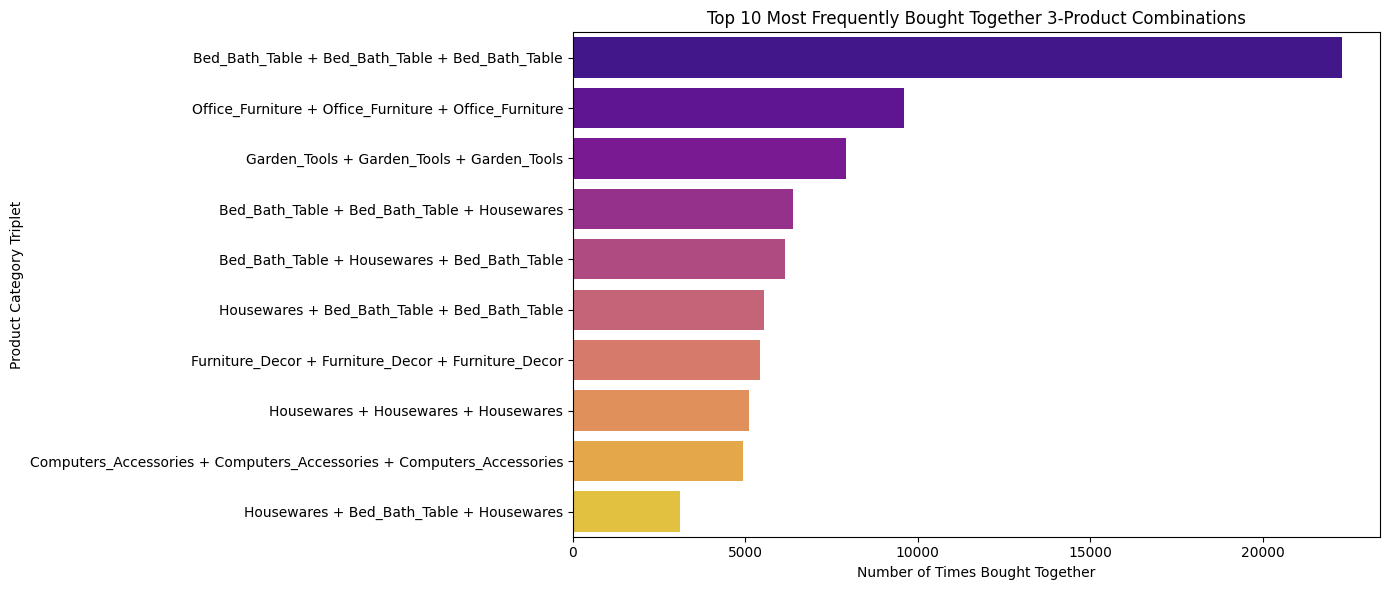

In [87]:
# Convert combinations to readable string labels
top_10_combinations_3 = combination_of_3_produuct.head(10).reset_index()
top_10_combinations_3.columns = ['product_triplet', 'count']
top_10_combinations_3['product_triplet'] = top_10_combinations_3['product_triplet'].apply(
    lambda x: f"{x[0]} + {x[1]} + {x[2]}"
)

plt.figure(figsize=(14, 6))
sns.barplot(
    y='product_triplet',
    x='count',
    data=top_10_combinations_3,
    palette='plasma'
)

plt.title('Top 10 Most Frequently Bought Together 3-Product Combinations')
plt.xlabel('Number of Times Bought Together')
plt.ylabel('Product Category Triplet')
plt.tight_layout()
plt.show()

# 17. Distribution of Payment Methods Used by Customers

payment_type
credit_card    87784
UPI            23190
voucher         6465
debit_card      1706
not_defined        3
Name: count, dtype: int64


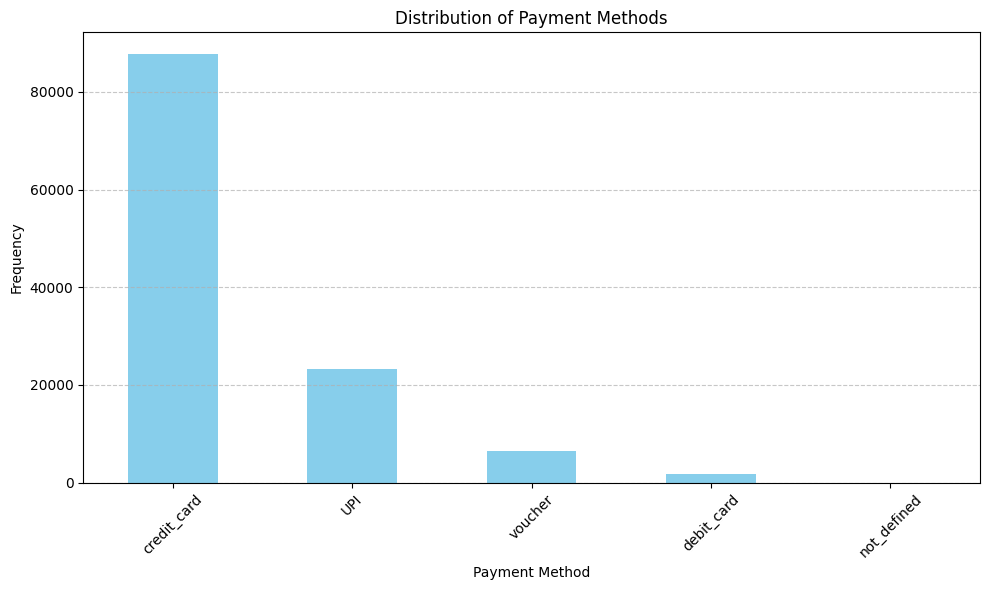

In [88]:
payment_distribution = final_df['payment_type'].value_counts()
print(payment_distribution)

#Bar graph for payment distribution by customer
plt.figure(figsize=(10, 6))
payment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 18. Distribution of Payment Methods by Unique Customers

payment_type
UPI            19784
credit_card    76505
debit_card      1528
not_defined        3
voucher         3866
Name: customer_id, dtype: int64


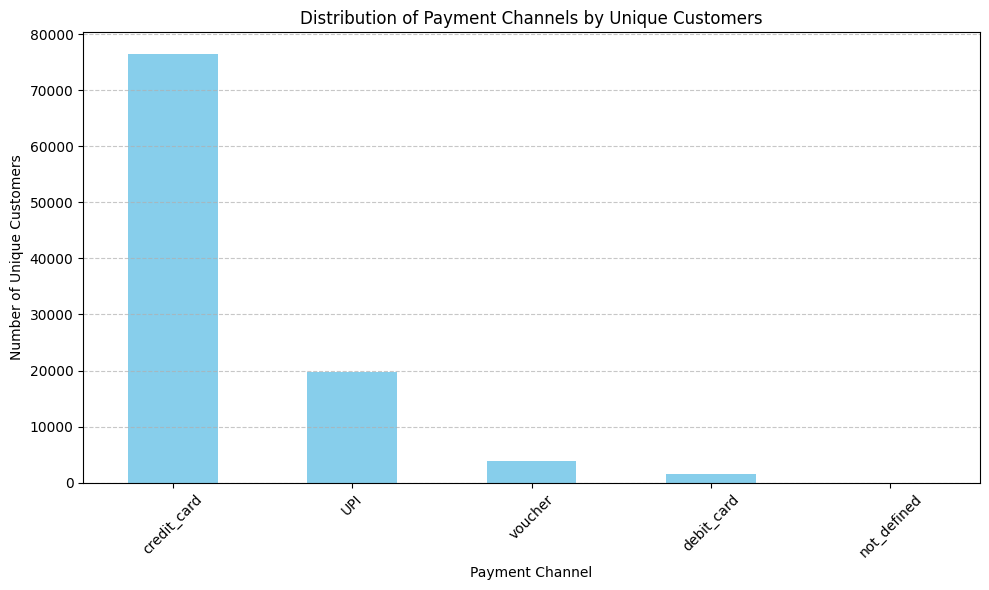

In [89]:
payment_channel_type=final_df.groupby(['payment_type'])['customer_id'].nunique()
print(payment_channel_type)

#Bar graph for Distribution of Payment Channels by Unique Customers
plt.figure(figsize=(10, 6))
payment_channel_type.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Channels by Unique Customers')
plt.xlabel('Payment Channel')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 19. Analysis of Product Categories by Average Customer Rating

In [90]:
# Grouping data by product category and calculating the average rating for each category
category_ratings=final_df.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score',ascending=False).reset_index()

#Top 10 maximum rated categories
max_rated_categories=category_ratings.head(10)

#minimum raated categories
min_rated_categories=category_ratings.tail(10)

print("Top 10 maximum rated categories:")
print(max_rated_categories)

print("\nTop 10 minimum rated categories:")
print(min_rated_categories)

Top 10 maximum rated categories:
                   product_category_name  review_score
0                      Cds_Dvds_Musicals      4.642857
1              Fashion_Childrens_Clothes      4.500000
2                 Books_General_Interest      4.431858
3                         Books_Imported      4.419355
4                        Books_Technical      4.345588
5                Costruction_Tools_Tools      4.333333
6  Small_Appliances_Home_Oven_And_Coffee      4.320513
7                             Food_Drink      4.312715
8                    Luggage_Accessories      4.290628
9                          Fashion_Sport      4.258065

Top 10 minimum rated categories:
                product_category_name  review_score
61          Construction_Tools_Safety      3.834171
62                              Audio      3.824147
63  Furniture_Mattress_And_Upholstery      3.804878
64             Fashio_Female_Clothing      3.780000
65                    Fixed_Telephony      3.661765
66              

## A) Visualization of Top 10 Highest Rated Product Categories

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\3084191743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


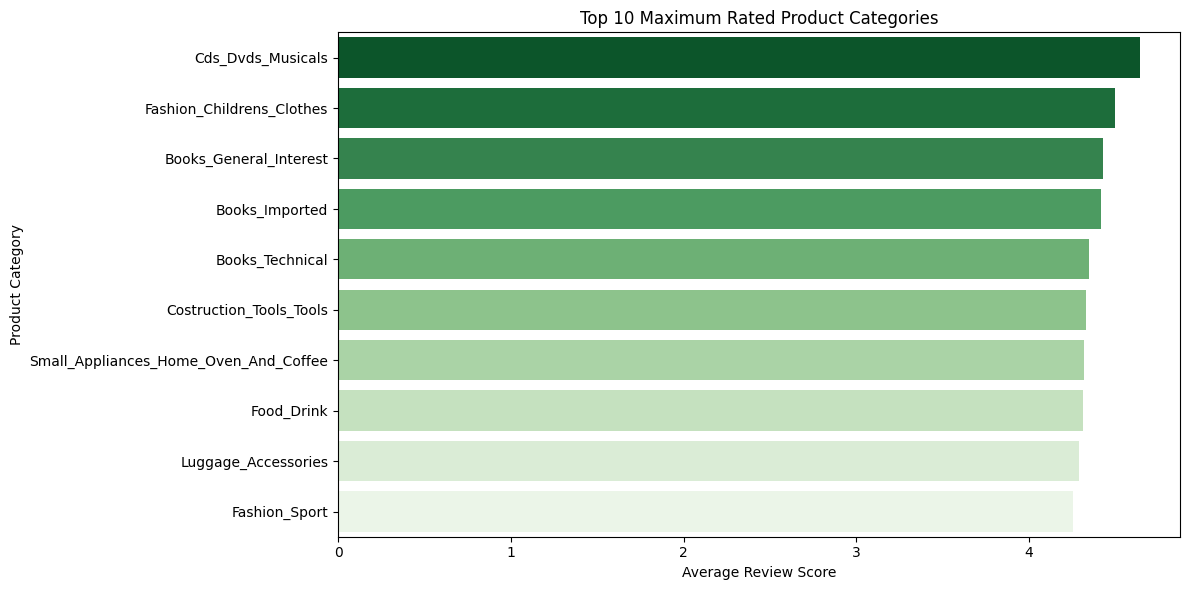

In [91]:
# Top 10 Max Rated
plt.figure(figsize=(12, 6))
sns.barplot(
    x='review_score',
    y='product_category_name',
    data=max_rated_categories,
    palette='Greens_r'
)
plt.title('Top 10 Maximum Rated Product Categories')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

## B) Visualization of Bottom 10 Lowest Rated Product Categories

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\996786680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


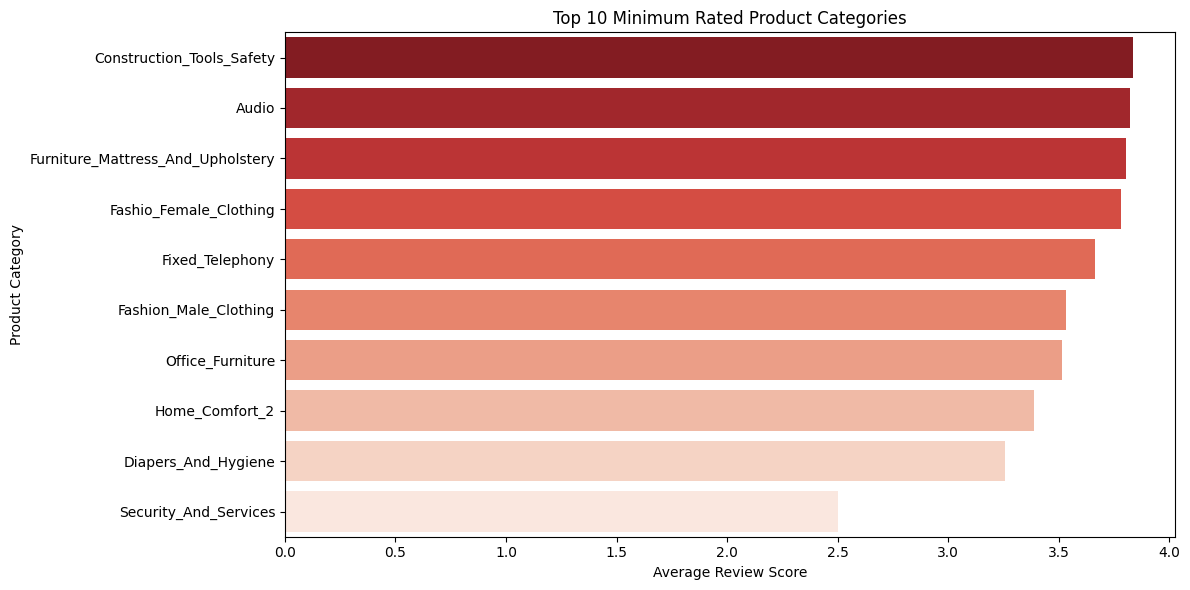

In [92]:
# Top 10 Min Rated
plt.figure(figsize=(12, 6))
sns.barplot(
    x='review_score',
    y='product_category_name',
    data=min_rated_categories,
    palette='Reds_r'
)
plt.title('Top 10 Minimum Rated Product Categories')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# 20. Analysis of Products by Average Customer Rating

In [93]:
# Grouping data by product  and calculating the average rating for each product
product_ratings=final_df.groupby(['product_id'])[['review_score']].mean().sort_values(by='review_score',ascending=False).reset_index()

#Top 10 maximum rated categories
max_rated_products=product_ratings.head(10)

#minimum raated categories
min_rated_products=product_ratings.tail(10)

print("Top 10 maximum rated categories:")
print(max_rated_products)

print("\nTop 10 minimum rated categories:")
print(min_rated_products)

Top 10 maximum rated categories:
                         product_id  review_score
0  ffd246249e3225c13f40b5b91dcaa65a           5.0
1  ffe8083298f95571b4a66bfbc1c05524           5.0
2  ffe0fc4e02c3559643ac063fa5cf9d07           5.0
3  ffe013e1b4603e3b0b02fbb159d5b400           5.0
4  0030026a6ddb3b2d1d4bc225b4b4c4da           5.0
5  002ec297b1b00fb9dde7ee6ac24b6771           5.0
6  002c6dab60557c48cfd6c2222ef7fd76           5.0
7  002af88741ba70c7b5cf4e4a0ad7ef85           5.0
8  002959d7a0b0990fe2d69988affcbc80           5.0
9  0021a87d4997a48b6cef1665602be0f5           5.0

Top 10 minimum rated categories:
                             product_id  review_score
32941  fff28f91211774864a1000f918ed00cc           1.0
32942  00efb9a8ce0cf3b2f37892ab003edc10           1.0
32943  00e62bcf9337ca4c5d5b4c5c8188f8d2           1.0
32944  ba7bd7333b4f0c78d1c1e1693a4f97b7           1.0
32945  01084e8138d03dc691daa19aa6c12471           1.0
32946  0103863bf3441460142ec23c74388e4c           1.0
32947

# 21. Multidimensional Analysis of Average Customer Ratings

In [64]:
# Average rating by location
avg_rating_by_location = final_df.groupby('customer_state')['review_score'].mean()

# Average rating by seller
avg_rating_by_seller = final_df.groupby('seller_id')['review_score'].mean()

# Average rating by product
avg_rating_by_product = final_df.groupby('product_id')['review_score'].mean()

# Average rating by category
avg_rating_by_category = final_df.groupby('product_category_name')['review_score'].mean()

# Average rating by month
avg_rating_by_month = final_df.groupby('order_month')['review_score'].mean()

print("Average rating by location:")
print(avg_rating_by_location)
print("-"*50)

print("\nAverage rating by seller:")
print(avg_rating_by_seller)
print("-"*50)

print("\nAverage rating by product:")
print(avg_rating_by_product)
print("-"*50)

print("\nAverage rating by category:")
print(avg_rating_by_category)
print("-"*50)

print("\nAverage rating by month:")
print(avg_rating_by_month)

Average rating by location:
customer_state
Andhra Pradesh       3.979456
Arunachal Pradesh    4.009036
Chhattisgarh         4.015241
Delhi                4.017690
Goa                  4.800000
Gujarat              4.021790
Haryana              4.087087
Himachal Pradesh     3.974713
Jammu & Kashmir      3.989125
Karnataka            4.000435
Kerala               4.034560
Madhya Pradesh       3.969208
Maharashtra          4.072222
Orissa               4.079886
Punjab               4.150579
Rajasthan            4.091793
Tamil Nadu           4.100121
Uttar Pradesh        4.119529
Uttaranchal          3.718182
West Bengal          3.988399
Name: review_score, dtype: float64
--------------------------------------------------

Average rating by seller:
seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.883817
001e6ad469a905060d959994f1b41e4f    1.000000
002100f778ceb8431b7a1020ff7ab48f    4.033898
003554e2dce176b5555353e4f3555ac8    5.000000
         

## A) Visualization of Average Rating by Customer State

C:\Users\thaku\AppData\Local\Temp\ipykernel_25872\2238548403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


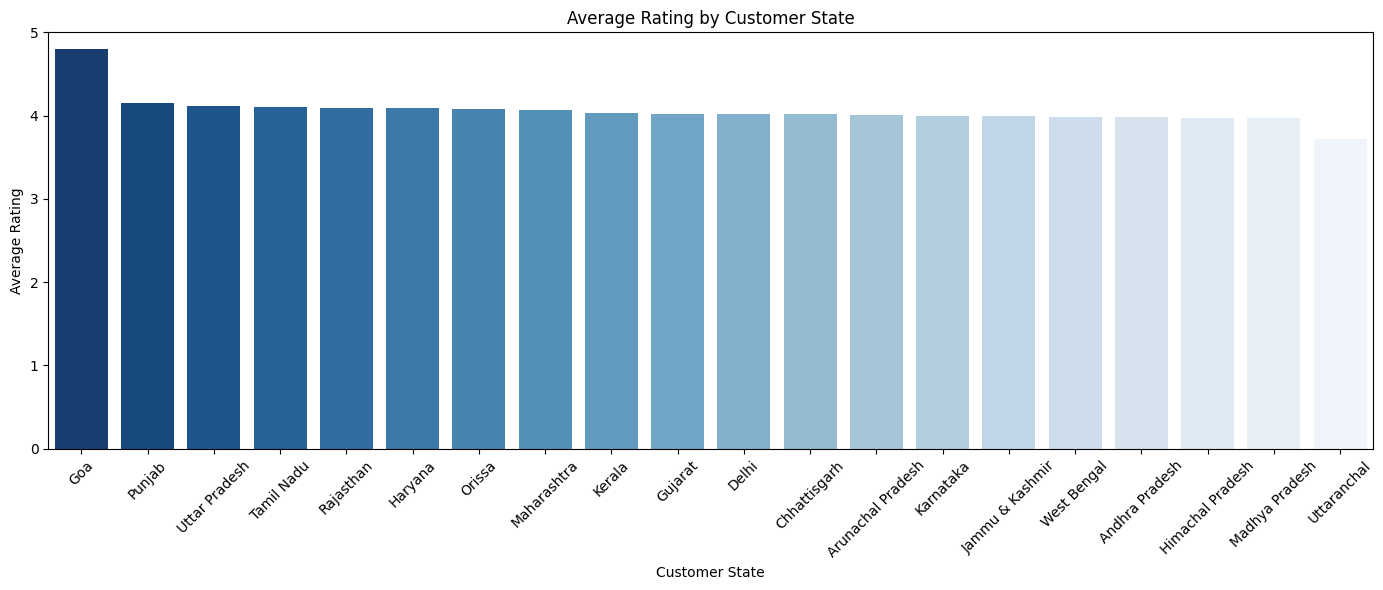

In [95]:
# Prepare sorted data for location
avg_rating_by_location_sorted = avg_rating_by_location.sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(
    x=avg_rating_by_location_sorted.index,
    y=avg_rating_by_location_sorted.values,
    palette='Blues_r'
)
plt.title('Average Rating by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## B)  Visualization of Average Rating by Product Category

C:\Users\thaku\AppData\Local\Temp\ipykernel_36188\677744175.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


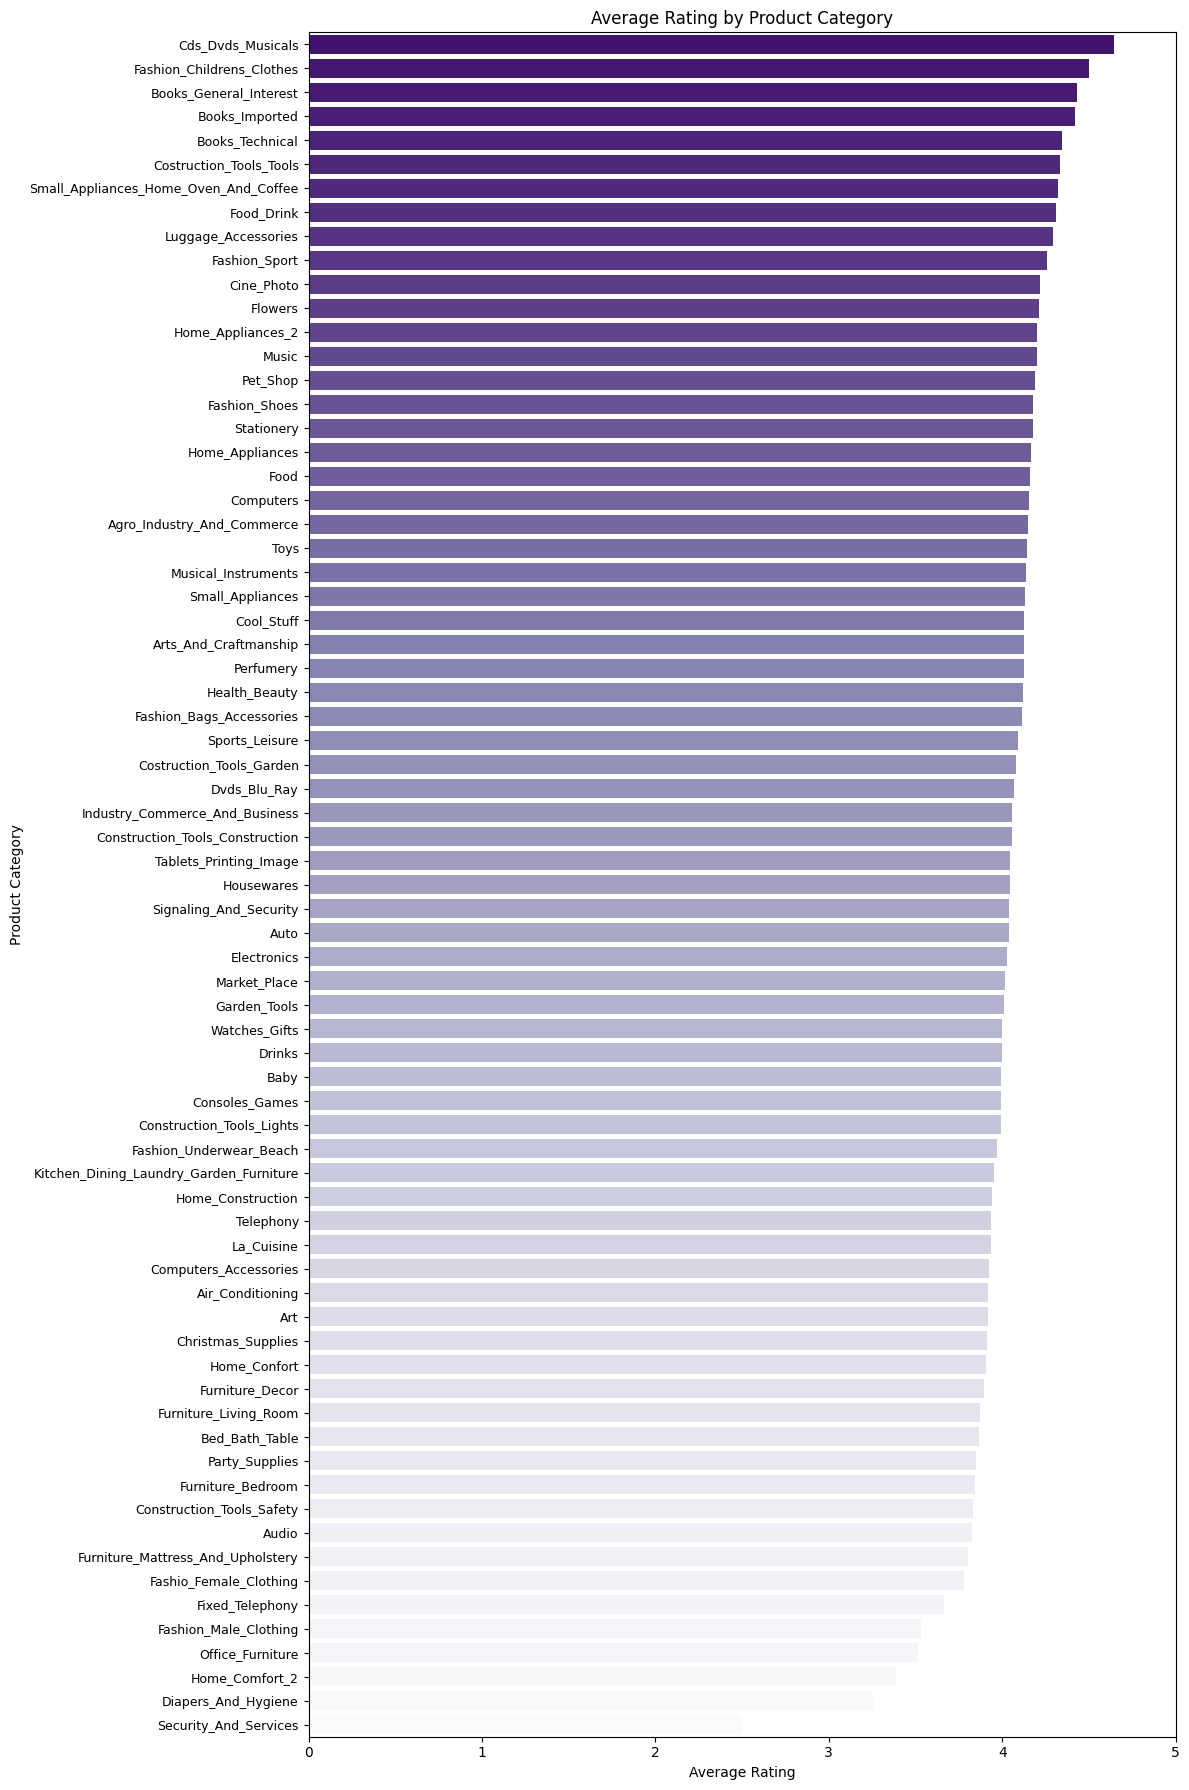

In [67]:
# Prepare sorted data for category
avg_rating_by_category_sorted = avg_rating_by_category.sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 18))
sns.barplot(
    y='product_category_name',
    x='review_score',
    data=avg_rating_by_category_sorted,
    palette='Purples_r'
)
plt.title('Average Rating by Product Category')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.xlim(0, 5)
plt.tick_params(axis='y', labelsize=9)  # Optional
plt.tight_layout()
plt.show()

## C) Visualization of Average Rating by Month

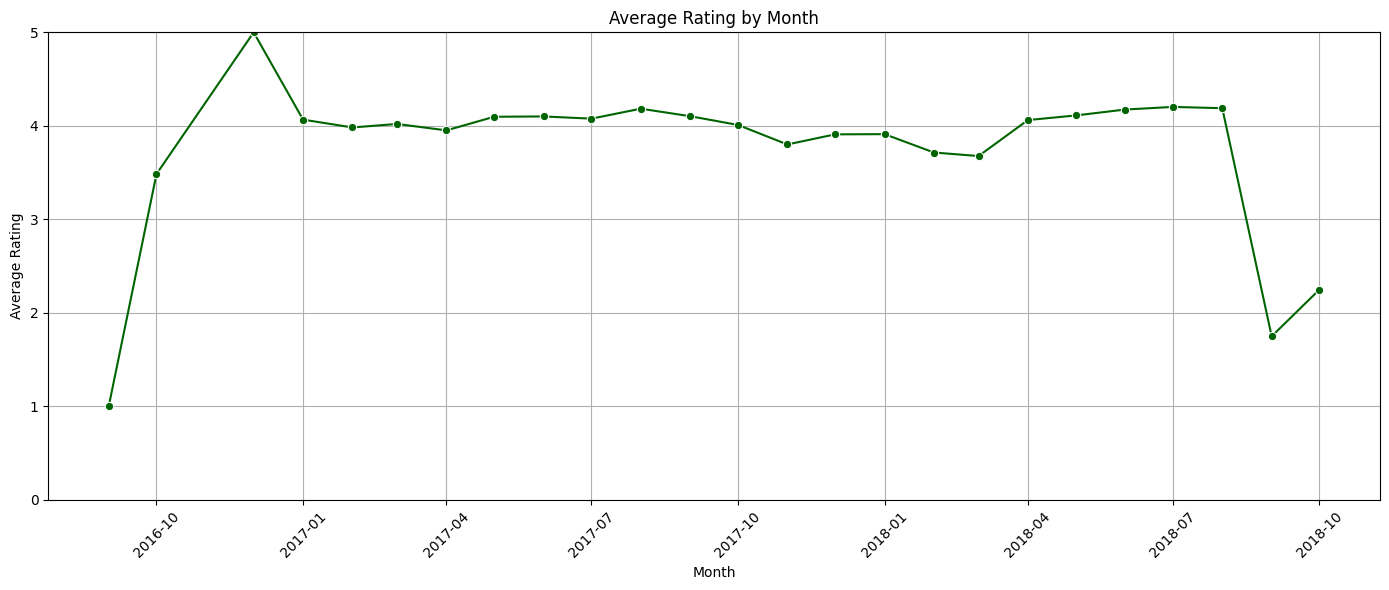

In [97]:
# Convert PeriodIndex to DatetimeIndex for proper plotting
avg_rating_by_month.index = avg_rating_by_month.index.to_timestamp()

plt.figure(figsize=(14, 6))
sns.lineplot(
    x=avg_rating_by_month.index,
    y=avg_rating_by_month.values,
    marker='o',
    color='darkgreen'
)
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()